In [234]:
import logging
from astrodb_utils import load_astrodb, AstroDBError
from simple.utils.spectra import check_spectrum_plottable
from astrodb_utils.fits import add_missing_keywords, add_wavelength_keywords, check_header
from astropy.io import fits
import astropy.units as u
import os
import pandas as pd
import numpy as np
from specutils import Spectrum1D, Spectrum, SpectralRegion
from specutils.manipulation import extract_region
from astropy.wcs import WCS



In [207]:
path = "/Users/guanying/SIMPLE Archieve/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files"

In [208]:
path = "/Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files"
print(os.path.exists(os.path.join(path,"SDSS_J134749.74+333601.7_sdL0_SDSS_Primeval-I.txt")))


True


In [209]:
# Handle txt files first separately
file_plotted = 0
file_failed = 0
for filename in os.listdir(path):
    if filename.endswith(".txt"):
    
        print(f"Reading text file: {filename}")

        file_path = os.path.join(path, filename)
        
        try:
            data = np.loadtxt(file_path, comments="#", encoding="latin1")

            # column1: #w         column2:flux          
            if (filename == "SDSS_J134749.74+333601.7_sdL0_SDSS_Primeval-I.txt"):
                wavelength = (data[:, 0] * u.AA).to(u.um)
                flux = data[:, 1] * (u.erg / (u.cm**2 * u.s * u.micron))

            # column1: #w (micron)         column2:flux          
            else:
                wavelength = (data[:, 0] * u.um)
                flux = data[:, 1] * (u.erg / (u.cm**2))

            # check plottability
            spectrum = Spectrum1D(spectral_axis=wavelength, flux=flux)
            check_spectrum_plottable(spectrum, show_plot=True)
            file_plotted += 1
        
        except Exception as e:
            print(f"Could not read {filename}: {e}")
            file_failed += 1
print(f"Total files plotted: {file_plotted}")


In [1]:
file_path = os.path.join(path, "SDSS_J010448.46+153501.8_usdL1.5_Xshooter_VIS_Primeval-II.fits")
spectrum.flux.unit == ""
with fits.open(file_path) as hdul:
    header=  hdul[0].header
    w = WCS(header)
    W = WCS.world_axis_physical_types
    
    print(f"WCS: {w}")
    
spectrum = Spectrum.read(file_path, format="wcs1d-fits", spectral_axis_index=0)


NameError: name 'os' is not defined


 Reading FITS file: ULAS_J021642.96+004005.7_sdL4_Xshooter_VIS_Primeval-I.fits
WCS: WCS Keywords

Number of WCS axes: 1
CTYPE : 'LINEAR' 
CRVAL : 5800.0 
CRPIX : 1.0 
CD1_1  : 0.2 
NAXIS : 22001  0
flux unit: erg / (Angstrom s cm2) wavelength unit: Angstrom


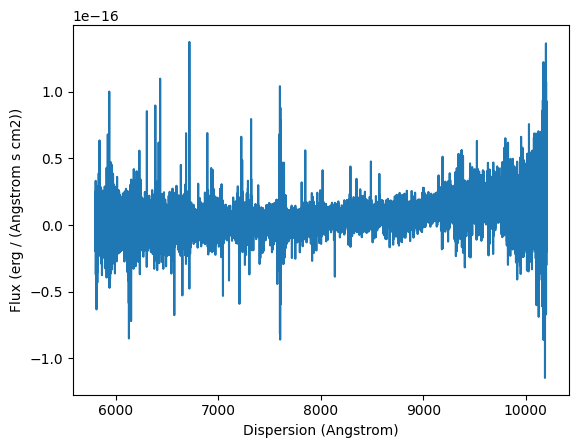

File ULAS_J021642.96+004005.7_sdL4_Xshooter_VIS_Primeval-I.fits is plottable.

 Reading FITS file: ULAS_J223302.03+062030.8_esdL0.5_Xshooter_VIS_Primeval-IV.fits
WCS: WCS Keywords

Number of WCS axes: 1
CTYPE : 'LINEAR' 
CRVAL : 533.660001035733 
CRPIX : -2316.00000000232 
CD1_1  : 0.0199999995529652 
NAXIS : 22001  0
flux unit: erg / (Angstrom s cm2) wavelength unit: nm


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


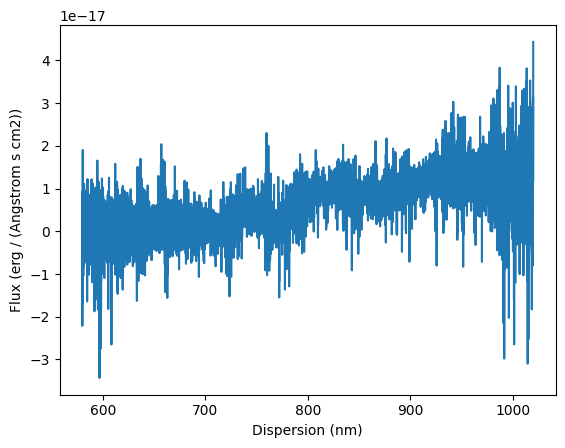

File ULAS_J223302.03+062030.8_esdL0.5_Xshooter_VIS_Primeval-IV.fits is plottable.

 Reading FITS file: ULAS_J230711.01+014447.1_usdL4.5_Xshooter_VIS_Primeval-III.fits
WCS: WCS Keywords

Number of WCS axes: 1
CTYPE : 'LINEAR' 
CRVAL : 533.660001035733 
CRPIX : -2316.00000000232 
CD1_1  : 0.0199999995529652 
NAXIS : 22001  0
flux unit: erg / (Angstrom s cm2) wavelength unit: nm


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


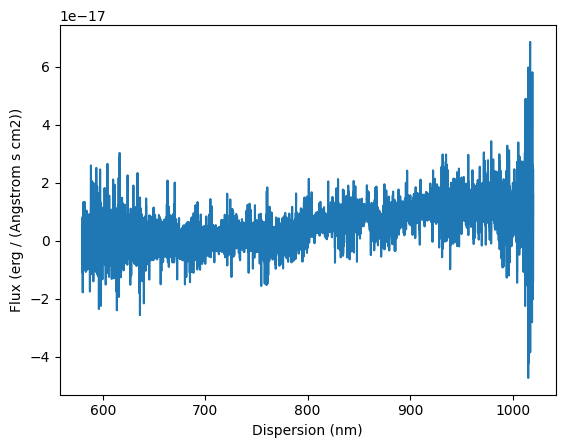

File ULAS_J230711.01+014447.1_usdL4.5_Xshooter_VIS_Primeval-III.fits is plottable.

 Reading FITS file: 2MASS_J06164006-6407194_esdL6_Xshooter_VIS_Primeval-I.fits


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


WCS: WCS Keywords

Number of WCS axes: 1
CTYPE : 'LINEAR' 
CRVAL : 533.660001035733 
CRPIX : -2316.00000000232 
CD1_1  : 0.0199999995529652 
NAXIS : 22001  0
flux unit: erg / (Angstrom s cm2) wavelength unit: nm


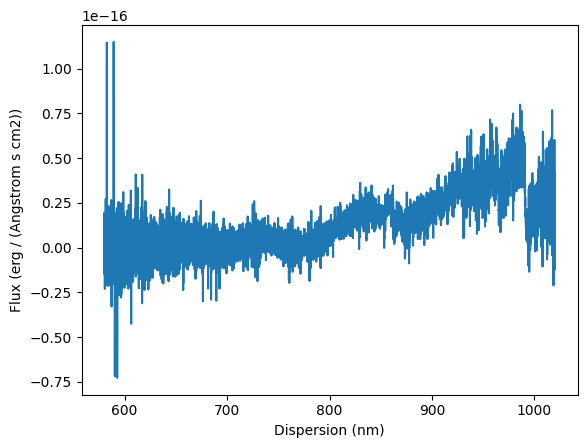

WARNING

File 2MASS_J06164006-6407194_esdL6_Xshooter_VIS_Primeval-I.fits is plottable.

 Reading FITS file: SDSS_J010448.46+153501.8_usdL1.5_Xshooter_VIS_Primeval-II.fits
WCS: WCS Keywords

Number of WCS axes: 2
CTYPE : 'LINEAR' '' 
CRVAL : 533.65885533784 0.0 
CRPIX : -1316.02868326581 0.0 
CD1_1 CD1_2  : 0.0200004335492849 0.0 
CD2_1 CD2_2  : 0.0 1.0 
NAXIS : 22993  0
Could not read SDSS_J010448.46+153501.8_usdL1.5_Xshooter_VIS_Primeval-II.fits: Input WCS must have exactly one axis with spectral units, found 0

 Reading FITS file: ULAS_J141203.85+121609.9_sdL5_Xshooter_VIS_Primeval-IV.fits
WCS: WCS Keywords

Number of WCS axes: 1
CTYPE : 'LINEAR' 
CRVAL : 533.660001035733 
CRPIX : -2316.00000000232 
CD1_1  : 0.0199999995529652 
NAXIS : 22001  0


: FITSFixedWarning: RADECSYS= 'FK5 ' / Coordinate system 
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


flux unit: erg / (Angstrom s cm2) wavelength unit: nm


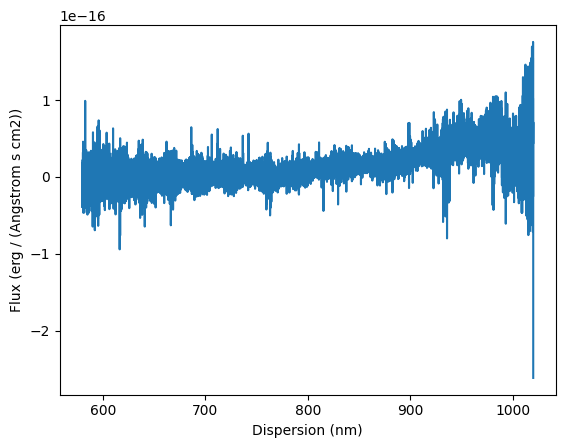

File ULAS_J141203.85+121609.9_sdL5_Xshooter_VIS_Primeval-IV.fits is plottable.

 Reading FITS file: ULAS_J151913.03-000030.0_sdL4_Xshooter_VIS_Primeval-I.fits
WCS: WCS Keywords

Number of WCS axes: 1
CTYPE : 'LINEAR' 
CRVAL : 5800.0 
CRPIX : 1.0 
CD1_1  : 0.2 
NAXIS : 22001  0
flux unit: erg / (Angstrom s cm2) wavelength unit: Angstrom


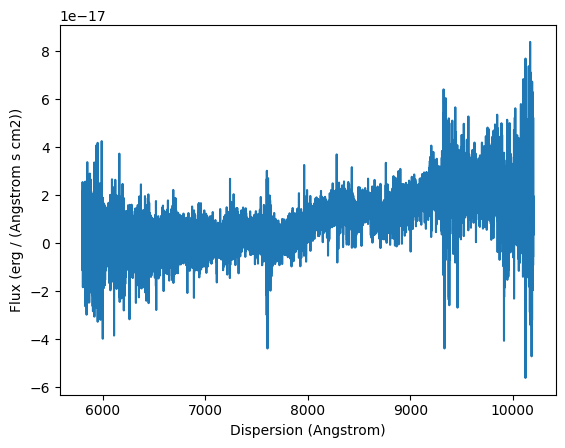

File ULAS_J151913.03-000030.0_sdL4_Xshooter_VIS_Primeval-I.fits is plottable.

 Reading FITS file: ULAS_J130710.22+151103.4_sdL8_Xshooter_VIS_Primeval-IV.fits.fits
WCS: WCS Keywords

Number of WCS axes: 2
CTYPE : 'LINEAR' '' 
CRVAL : 533.660000320511 0.0 
CRPIX : -716.000000000667 0.0 
CD1_1 CD1_2  : 0.0199999995529652 0.0 
CD2_1 CD2_2  : 0.0 1.0 
NAXIS : 23601  0
Could not read ULAS_J130710.22+151103.4_sdL8_Xshooter_VIS_Primeval-IV.fits.fits: Input WCS must have exactly one axis with spectral units, found 0

 Reading FITS file: ULAS_J024035.36+060629.3_sdM7_Xshooter_VIS_Primevl-IV.fits
WCS: WCS Keywords

Number of WCS axes: 1
CTYPE : 'LINEAR' 
CRVAL : 533.660001035733 
CRPIX : -2316.00000000232 
CD1_1  : 0.0199999995529652 
NAXIS : 22001  0


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


flux unit: erg / (Angstrom s cm2) wavelength unit: nm


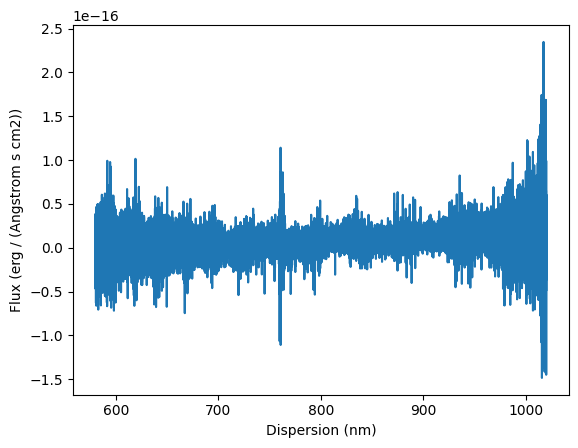

File ULAS_J024035.36+060629.3_sdM7_Xshooter_VIS_Primevl-IV.fits is plottable.

 Reading FITS file: ULAS_J135058.85+081506.8_usdL3_Xshooter_VIS_Primeval-III.fits
WCS: WCS Keywords

Number of WCS axes: 3
CTYPE : 'LINEAR' 'LINEAR' 'LINEAR' 
CRVAL : 533.660001035733 0.0 0.0 
CRPIX : -2316.00000000232 0.0 0.0 
CD1_1 CD1_2 CD1_3  : 0.0199999995529652 0.0 0.0 
CD2_1 CD2_2 CD2_3  : 0.0 1.0 0.0 
CD3_1 CD3_2 CD3_3  : 0.0 0.0 1.0 
NAXIS : 22001  1  4


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


flux unit: erg / (Angstrom s cm2) wavelength unit: nm


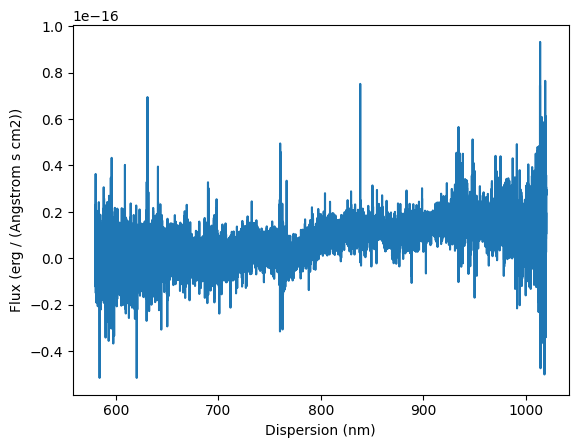

File ULAS_J135058.85+081506.8_usdL3_Xshooter_VIS_Primeval-III.fits is plottable.

 Reading FITS file: ULAS_J020858.62+020657.0_esdL3_Xshooter_VIS_Primeval-III.fits
WCS: WCS Keywords

Number of WCS axes: 3
CTYPE : 'LINEAR' 'LINEAR' 'LINEAR' 
CRVAL : 533.66000058872 0.0 0.0 
CRPIX : -1316.00000000126 0.0 0.0 
CD1_1 CD1_2 CD1_3  : 0.0199999995529652 0.0 0.0 
CD2_1 CD2_2 CD2_3  : 0.0 1.0 0.0 
CD3_1 CD3_2 CD3_3  : 0.0 0.0 1.0 
NAXIS : 23001  1  4
flux unit: erg / (Angstrom s cm2) wavelength unit: nm


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


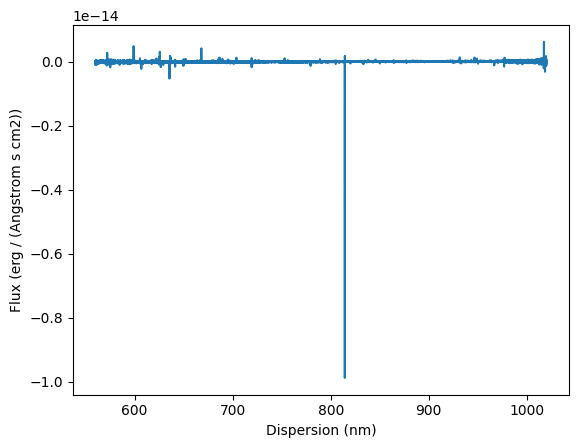

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


File ULAS_J020858.62+020657.0_esdL3_Xshooter_VIS_Primeval-III.fits is plottable.

 Reading FITS file: ULAS_J233227.03+123452.0_L6p+T4p_Xshooter_VIS_Primeval-IV.fits
WCS: WCS Keywords

Number of WCS axes: 1
CTYPE : 'LINEAR' 
CRVAL : 533.660001035733 
CRPIX : -2316.00000000232 
CD1_1  : 0.0199999995529652 
NAXIS : 22001  0
flux unit: erg / (Angstrom s cm2) wavelength unit: nm


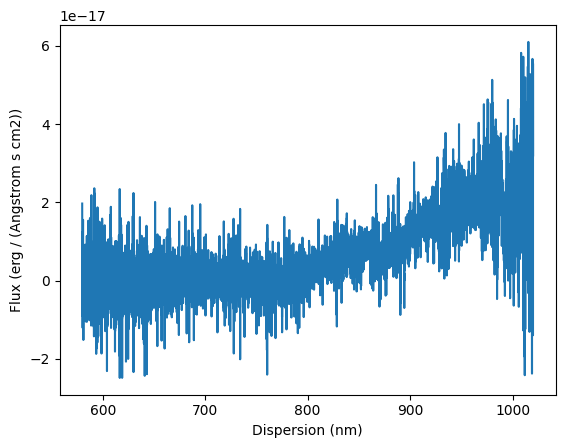

File ULAS_J233227.03+123452.0_L6p+T4p_Xshooter_VIS_Primeval-IV.fits is plottable.

 Reading FITS file: 2MASS_J06453153-6646120_sdL8_Xshooter_VIS_Primeval-IV.fits


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


WCS: WCS Keywords

Number of WCS axes: 1
CTYPE : 'LINEAR' 
CRVAL : 533.660001035733 
CRPIX : -2316.00000000232 
CD1_1  : 0.0199999995529652 
NAXIS : 22001  0
flux unit: erg / (Angstrom s cm2) wavelength unit: nm


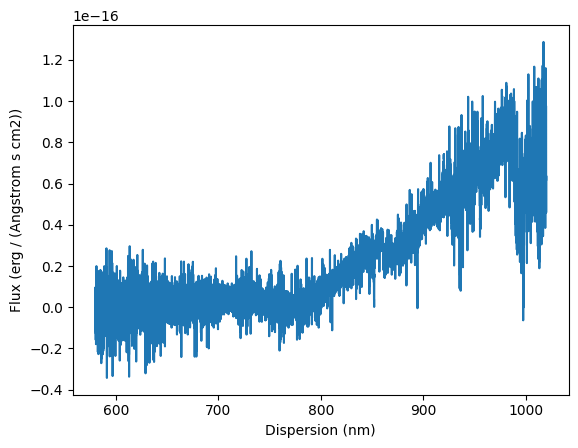

File 2MASS_J06453153-6646120_sdL8_Xshooter_VIS_Primeval-IV.fits is plottable.
Total FITS files plotted: 11
Total FITS files failed: 2


In [235]:
# VIS Xshooter
file_plotted = 0
file_failed = 0
for filename in os.listdir(path):


    if filename.endswith("fits") and "xshooter" in filename.lower() and "VIS" in filename.upper():

        file_path = os.path.join(path, filename)
        try:
            with fits.open(file_path) as hdul:
                print(f"\n Reading FITS file: {filename}")
                header = hdul[0].header
                w = WCS(header)
                print(f"WCS: {w}")
                
                spectrum = Spectrum.read(file_path)
                if(spectrum.flux.unit == ""):
                    spectrum = Spectrum.read(file_path, format="wcs1d-fits", flux_unit="erg / (cm2 s Angstrom)")


                print(f"flux unit: {spectrum.flux.unit} wavelength unit: {spectrum.spectral_axis.unit}")
                if check_spectrum_plottable(spectrum, show_plot=True):
                    file_plotted += 1
                    print(f"File {filename} is plottable.")

        except Exception as e:
            print(f"Could not read {filename}: {e}")
            file_failed += 1    
print(f"Total FITS files plotted: {file_plotted}")
print(f"Total FITS files failed: {file_failed}")


 Reading FITS file: ULAS_J141203.85+121609.9_sdL5_Xshooter_NIR_Primeval-IV.fits
flux unit: erg / (Angstrom s cm2) spectral_axis unit: nm


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


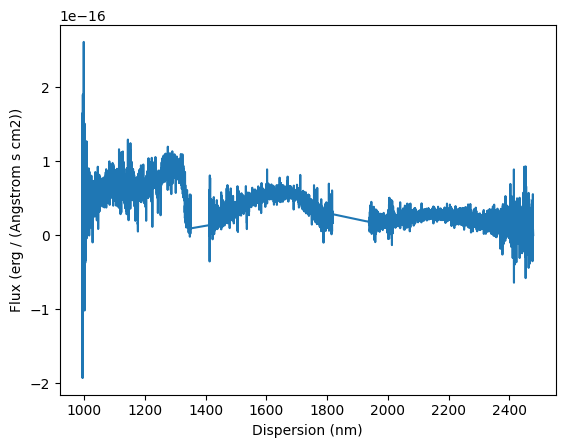

Plotable file name: ULAS_J141203.85+121609.9_sdL5_Xshooter_NIR_Primeval-IV.fits

 Reading FITS file: SDSS_J010448.46+153501.8_usdL1.5_Xshooter_NIR_Primeval-II.fits
Error reading SDSS_J010448.46+153501.8_usdL1.5_Xshooter_NIR_Primeval-II.fits: list index out of range
Header info: SIMPLE  =                    T / Fits standard                                  BITPIX  =                  -32 / Bits per pixel                                 NAXIS   =                    1 / Number of axes                                 NAXIS1  =                24517 / Axis length                                    EXTEND  =                    T / File may contain extensions                    ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        IRAF-TLM= '2016-10-20T12:11:15' / Time of last modification                     OBJECT  = 'sd0104  '           / Name of the object observed                    COMMENT   FITS (Flexible Image Transport System) format is defined in 'AstronomyC

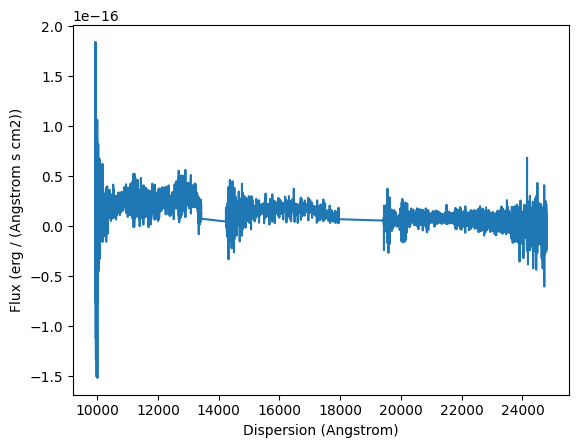

Plotable file name: ULAS_J021642.96+004005.7_sdL4_Xshooter_NIR_Primeval-I.fits

 Reading FITS file: ULAS_J230711.01+014447.1_usdL4.5_Xshooter_NIR_Primeval-III.fits
flux unit: erg / (Angstrom s cm2) spectral_axis unit: nm


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


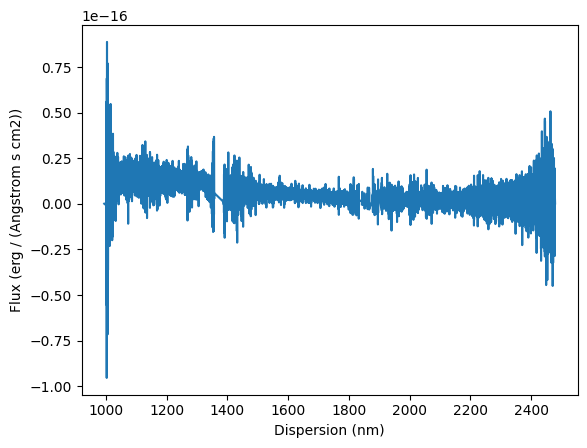

Plotable file name: ULAS_J230711.01+014447.1_usdL4.5_Xshooter_NIR_Primeval-III.fits

 Reading FITS file: ULAS_J233227.03+123452.0_L6p+T4p_Xshooter_NIR_Primeval-IV.fits
flux unit: erg / (Angstrom s cm2) spectral_axis unit: nm


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


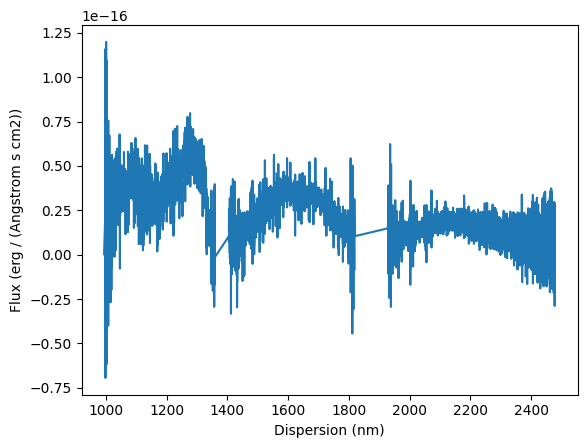

Plotable file name: ULAS_J233227.03+123452.0_L6p+T4p_Xshooter_NIR_Primeval-IV.fits

 Reading FITS file: 2MASS_J06453153-6646120_sdL8_Xshooter_NIR_Primeval-IV.fits
flux unit: erg / (Angstrom s cm2) spectral_axis unit: nm


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


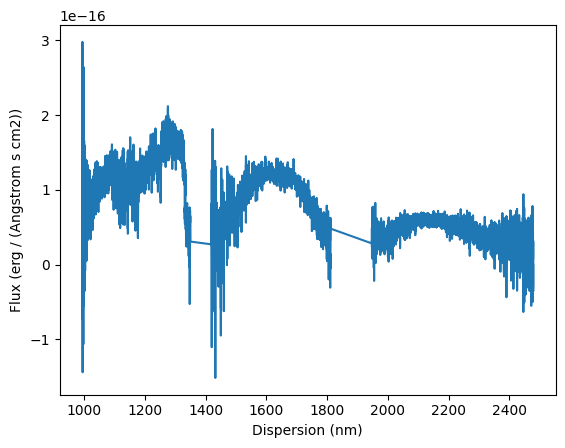

Plotable file name: 2MASS_J06453153-6646120_sdL8_Xshooter_NIR_Primeval-IV.fits

 Reading FITS file: 2MASS_J06164006-6407194_esdL6_Xshooter_NIR_Primeval-I.fits
flux unit: erg / (Angstrom s cm2) spectral_axis unit: nm


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


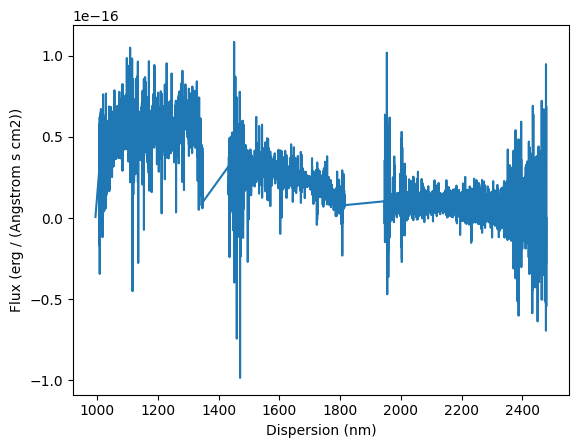

Plotable file name: 2MASS_J06164006-6407194_esdL6_Xshooter_NIR_Primeval-I.fits

 Reading FITS file: ULAS_J151913.03-000030.0_sdL4_Xshooter_NIR_Primeval-I.fits
flux unit: erg / (Angstrom s cm2) spectral_axis unit: Angstrom


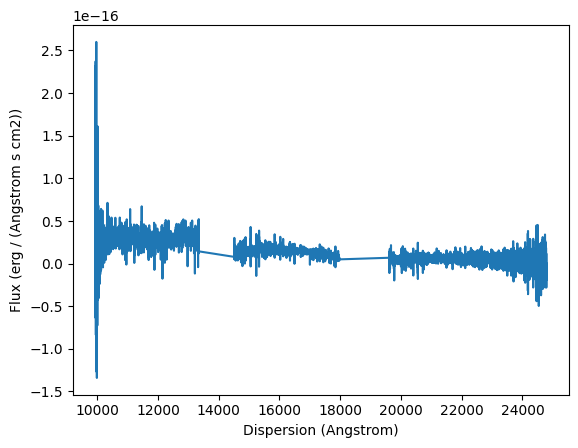

Plotable file name: ULAS_J151913.03-000030.0_sdL4_Xshooter_NIR_Primeval-I.fits

 Reading FITS file: ULAS_J223302.03+062030.8_esdL0.5_Xshooter_NIR_Primeval-IV.fits


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


flux unit: erg / (Angstrom s cm2) spectral_axis unit: nm


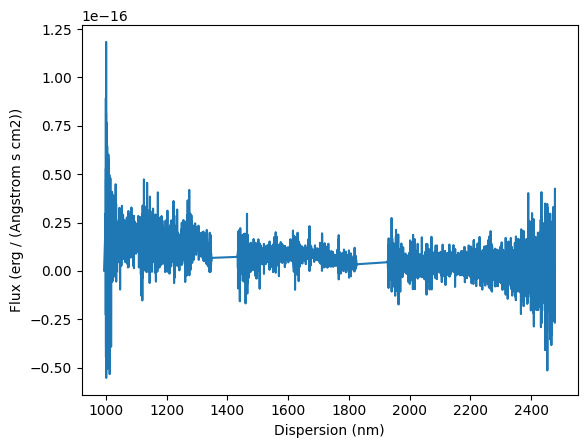

Plotable file name: ULAS_J223302.03+062030.8_esdL0.5_Xshooter_NIR_Primeval-IV.fits

 Reading FITS file: ULAS_J130710.22+151103.4_sdL8_Xshooter_NIR_Primeval-IV.fits
Error reading ULAS_J130710.22+151103.4_sdL8_Xshooter_NIR_Primeval-IV.fits: list index out of range
Header info: SIMPLE  =                    T / Fits standard                                  BITPIX  =                  -32 / Bits per pixel                                 NAXIS   =                    3 / Number of axes                                 NAXIS1  =                24750 / Axis length                                    NAXIS2  =                    1 / Axis length                                    NAXIS3  =                    4 / Axis length                                    EXTEND  =                    T / File may contain extensions                    ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        IRAF-TLM= '2018-07-11T11:37:40' / Time of last modification                     OBJE

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


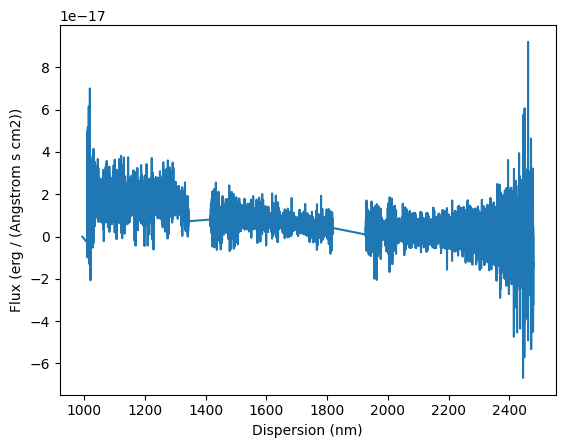

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Plotable file name: ULAS_J020858.62+020657.0_esdL3_Xshooter_NIR_Primeval-III.fits

 Reading FITS file: ULAS_J135058.85+081506.8_usdL3_Xshooter_NIR_Primeval-III.fits
Error reading ULAS_J135058.85+081506.8_usdL3_Xshooter_NIR_Primeval-III.fits: list index out of range
Header info: SIMPLE  =                    T / Fits standard                                  BITPIX  =                  -32 / Bits per pixel                                 NAXIS   =                    3 / Number of axes                                 NAXIS1  =                24750 / Axis length                                    NAXIS2  =                    1 / Axis length                                    NAXIS3  =                    4 / Axis length                                    EXTEND  =                    T / File may contain extensions                    ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        IRAF-TLM= '2017-01-26T13:20:00' / Time of last modification                     O

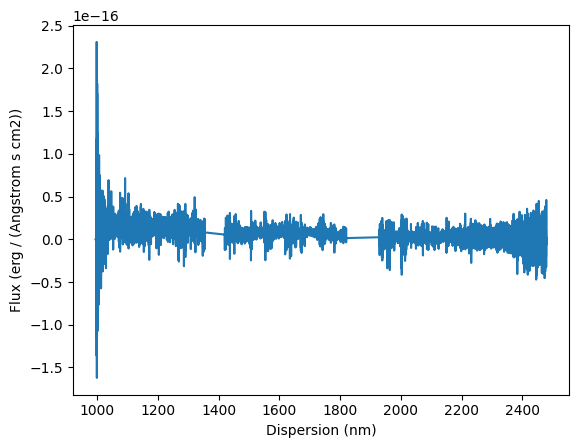

Plotable file name: ULAS_J024035.36+060629.3_sdM7_Xshooter_NIR_Primevl-IV.fits

Total files plotted: 10
Total files failed: 3


In [221]:
# NIR Xshooter
file_plotted = 0
file_failed = 0
for filename in os.listdir(path):


    if filename.endswith("fits") and "xshooter" in filename.lower() and "NIR" in filename.upper():

        file_path = os.path.join(path, filename)
        try:
            with fits.open(file_path) as hdul:
                print(f"\n Reading FITS file: {filename}")
                header = hdul[0].header

                if "ULAS_J021642.96+004005.7_sdL4_Xshooter_NIR_Primeval-I.fits" in filename or "ULAS_J151913.03-000030.0_sdL4_Xshooter_NIR_Primeval-I.fits" in filename:
                    spectrum = Spectrum.read(file_path, format="wcs1d-fits", flux_unit="erg / (cm2 s Angstrom)")

                elif "SDSS_J010448.46+153501.8_usdL1.5_Xshooter_NIR_Primeval-II.fits" in filename or "ULAS_J130710.22+151103.4_sdL8_Xshooter_NIR_Primeval-IV.fits" in filename or "ULAS_J135058.85+081506.8_usdL3_Xshooter_NIR_Primeval-III.fits" in filename:
                    print(f"shape: {hdul[1].data.shape}")
                    spectrum = Spectrum.read(file_path, format="wcs1d-fits", spectral_axis_index=0)
                else:
                    spectrum = Spectrum.read(file_path, format="wcs1d-fits")
                # spectrum.spectral_axis = spectrum.spectral_axis.to(u.um)
                print(f"flux unit: {spectrum.flux.unit} spectral_axis unit: {spectrum.spectral_axis.unit}")
                # Plot and check
                if check_spectrum_plottable(spectrum, raise_error=True, show_plot=True):
                    print(f"Plotable file name: {filename}")
                    file_plotted += 1

        except Exception as e:
            print(f"Error reading {filename}: {e}")
            print(f"Header info: {header}")
            file_failed += 1

print(f"\nTotal files plotted: {file_plotted}")
print(f"Total files failed: {file_failed}")



Reading OSIRIS FITS file: ULAS_J231949.36+044559.5_M7_comb_OSIRIS_scombine_Primeval-IV.fits

REPLACING erg / (angstrom s cm2) with erg / (angstrom s cm2)


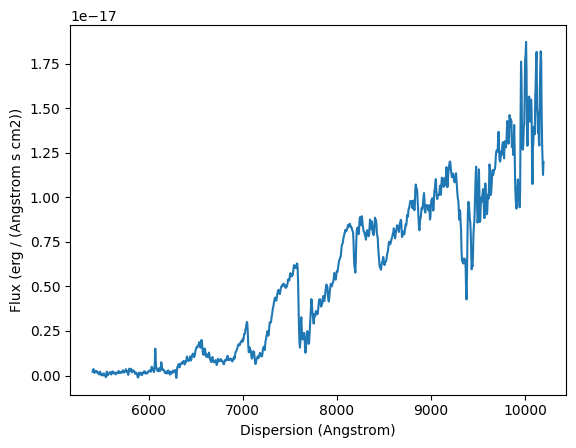

Plotable file name: ULAS_J231949.36+044559.5_M7_comb_OSIRIS_scombine_Primeval-IV.fits
Reading OSIRIS FITS file: ULAS_J010756.85+100811.3_sdM7_OSIRIS_GTC63-13A_Primeval-IV.fits

REPLACING erg / (angstrom s cm2) with erg / (angstrom s cm2)


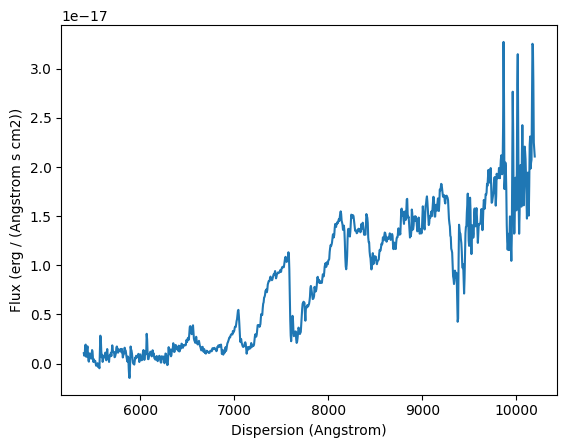

Plotable file name: ULAS_J010756.85+100811.3_sdM7_OSIRIS_GTC63-13A_Primeval-IV.fits
Reading OSIRIS FITS file: ULAS_J231924.35+052524.5_esdL1_OSIRIS_GTC39-12B_Primeval-IV.fits

REPLACING erg / (angstrom s cm2) with erg / (angstrom s cm2)


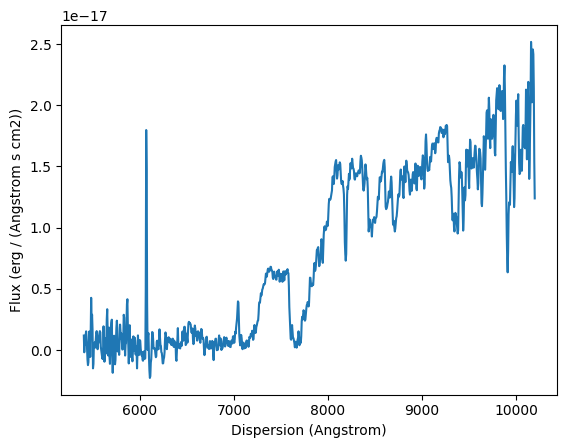

Plotable file name: ULAS_J231924.35+052524.5_esdL1_OSIRIS_GTC39-12B_Primeval-IV.fits
Reading OSIRIS FITS file: ULAS_J141203.85+121609.9_sdL5_OSIRIS_GTC39-12B_Primeval-IV.fits

REPLACING erg / (angstrom s cm2) with erg / (angstrom s cm2)


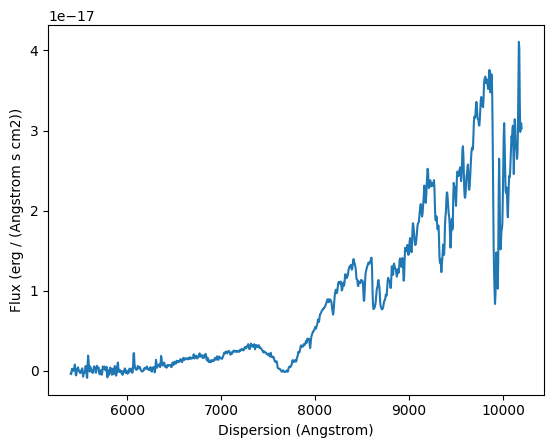

Plotable file name: ULAS_J141203.85+121609.9_sdL5_OSIRIS_GTC39-12B_Primeval-IV.fits
Reading OSIRIS FITS file: ULAS_J082206.61+044101.8_sdL0.5_OSIRIS_GTC39-12B_Primeval-IV.fits

REPLACING erg / (angstrom s cm2) with erg / (angstrom s cm2)


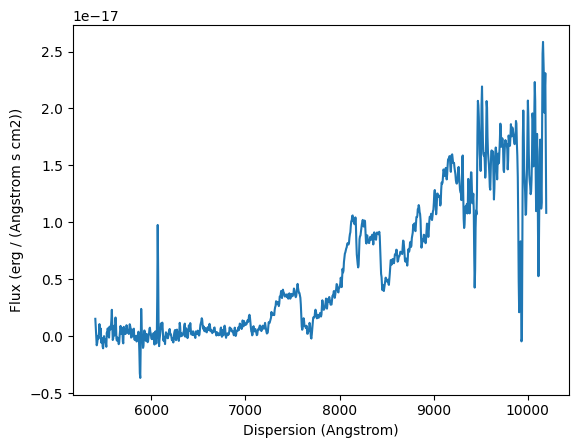

Plotable file name: ULAS_J082206.61+044101.8_sdL0.5_OSIRIS_GTC39-12B_Primeval-IV.fits
Reading OSIRIS FITS file: ULAS_J130710.22+151103.4_sdL8_OSIRIS_GTC46-14A_Primeval-IV.fits

REPLACING erg / (angstrom s cm2) with erg / (angstrom s cm2)


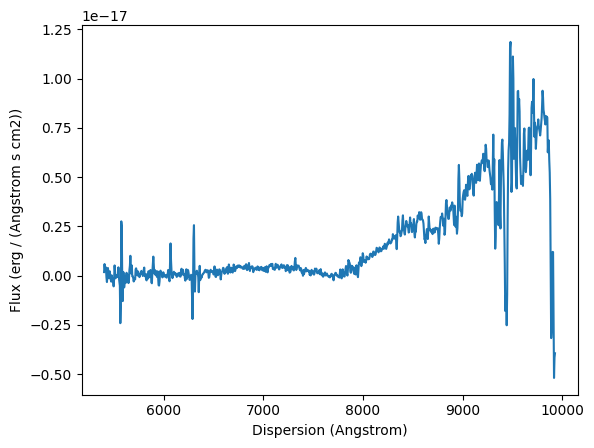

Plotable file name: ULAS_J130710.22+151103.4_sdL8_OSIRIS_GTC46-14A_Primeval-IV.fits
Reading OSIRIS FITS file: ULAS_J154638.34-011213.0_sdL3_OSIRIS_GTC63-13A_Primeval-IV.fits

REPLACING erg / (angstrom s cm2) with erg / (angstrom s cm2)


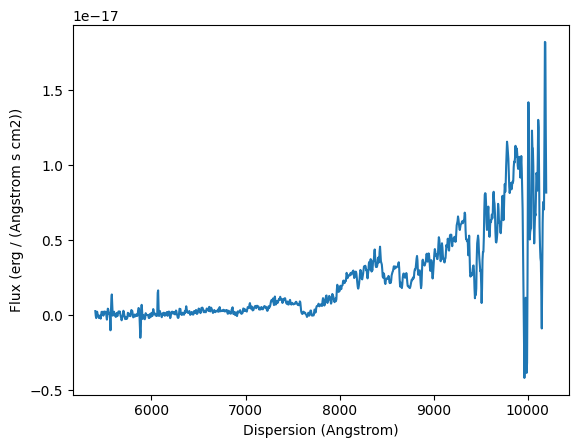

Plotable file name: ULAS_J154638.34-011213.0_sdL3_OSIRIS_GTC63-13A_Primeval-IV.fits
Reading OSIRIS FITS file: ULAS_J020628.22+020255.6_sdM7_OSIRIS_GTC39-12B_Primeval-IV.fits

REPLACING erg / (angstrom s cm2) with erg / (angstrom s cm2)


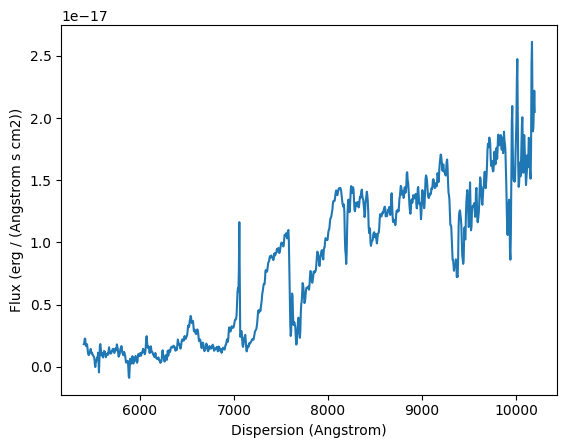

Plotable file name: ULAS_J020628.22+020255.6_sdM7_OSIRIS_GTC39-12B_Primeval-IV.fits
Reading OSIRIS FITS file: ULAS_J145234.65+043738.4_esdL0.5_OSIRIS_GTC39-12B_Primeval-IV.fits

REPLACING erg / (angstrom s cm2) with erg / (angstrom s cm2)


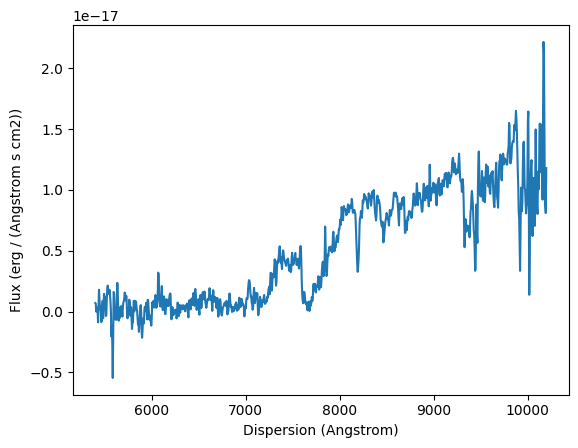

Plotable file name: ULAS_J145234.65+043738.4_esdL0.5_OSIRIS_GTC39-12B_Primeval-IV.fits
Reading OSIRIS FITS file: ULAS_J134206.86+053724.9_sdL1_OSIRIS_GTC46-14A_Primeval-IV.fits

REPLACING erg / (angstrom s cm2) with erg / (angstrom s cm2)


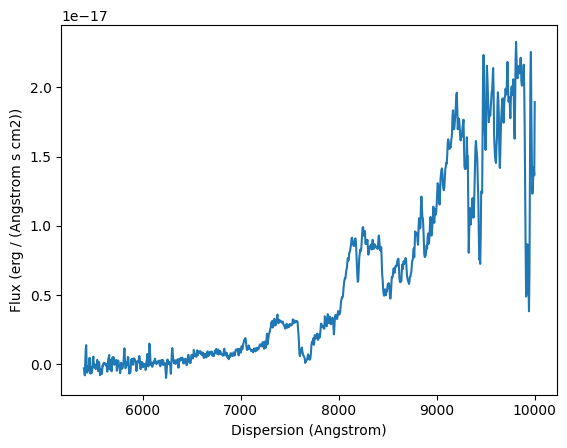

Plotable file name: ULAS_J134206.86+053724.9_sdL1_OSIRIS_GTC46-14A_Primeval-IV.fits
Reading OSIRIS FITS file: ULAS_J135216.31+312327.0_esdL0.5_OSIRIS_GTC46-14A_Primeval-IV.fits

REPLACING erg / (angstrom s cm2) with erg / (angstrom s cm2)


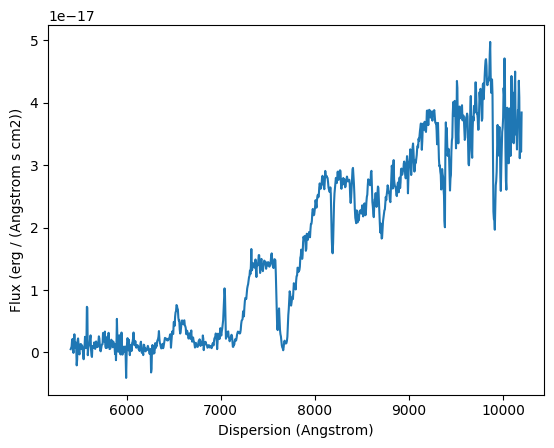

Plotable file name: ULAS_J135216.31+312327.0_esdL0.5_OSIRIS_GTC46-14A_Primeval-IV.fits
Reading OSIRIS FITS file: ULAS_J143154.18-004114.3_sdM9_OSIRIS_GTC46-14A_Primeval-IV.fits

REPLACING erg / (angstrom s cm2) with erg / (angstrom s cm2)


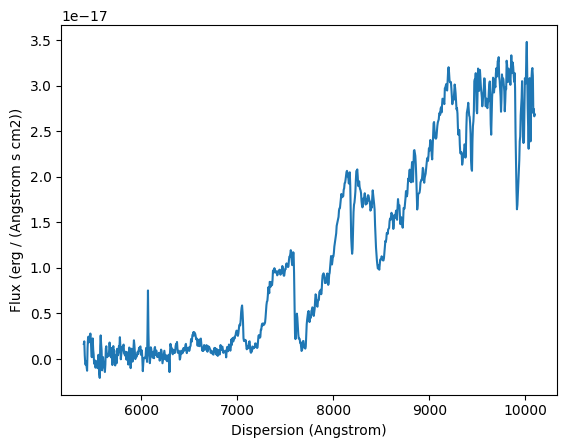

Plotable file name: ULAS_J143154.18-004114.3_sdM9_OSIRIS_GTC46-14A_Primeval-IV.fits
Reading OSIRIS FITS file: ULAS_J231924.35+052524.5_esdL1_OSIRIS_GTC63-13A_Primeval-IV.fits

REPLACING erg / (angstrom s cm2) with erg / (angstrom s cm2)


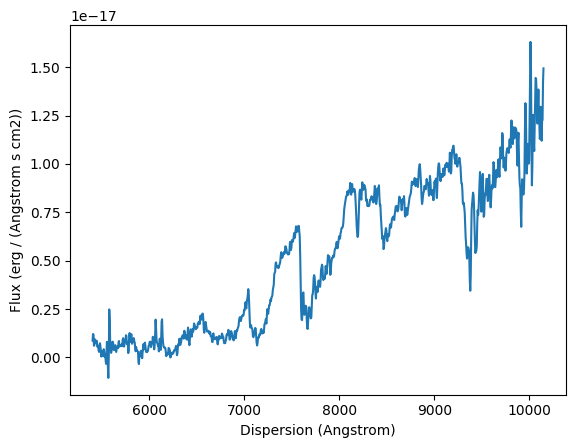

Plotable file name: ULAS_J231924.35+052524.5_esdL1_OSIRIS_GTC63-13A_Primeval-IV.fits
Reading OSIRIS FITS file: ULAS_J223440.80+001002.6_sdL1_OSIRIS_GTC63-13A_Primeval-IV.fits

REPLACING erg / (angstrom s cm2) with erg / (angstrom s cm2)


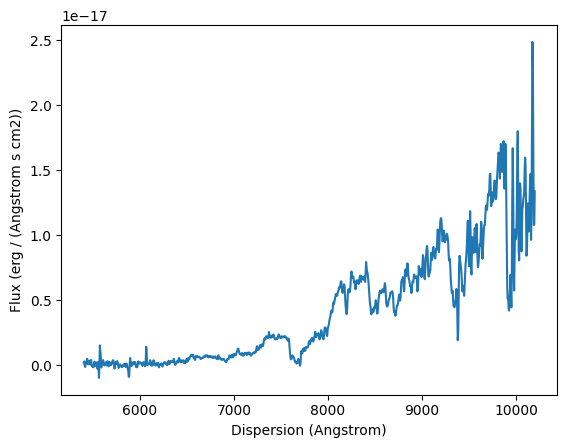

Plotable file name: ULAS_J223440.80+001002.6_sdL1_OSIRIS_GTC63-13A_Primeval-IV.fits
Reading OSIRIS FITS file: ULAS_J123142.99+015045.4_sdL0_OSIRIS_GTC80-15A_Primeval-IV.fits

REPLACING erg / (angstrom s cm2) with erg / (angstrom s cm2)


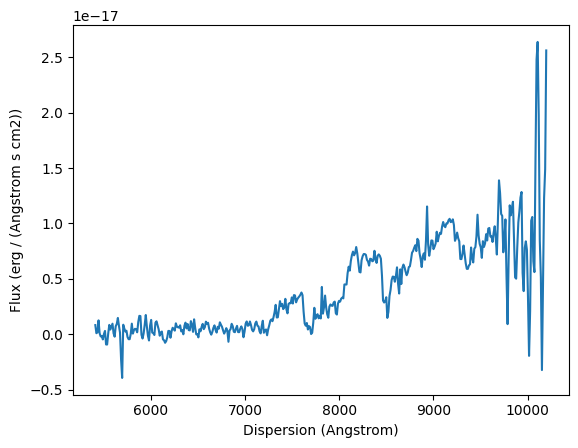

Plotable file name: ULAS_J123142.99+015045.4_sdL0_OSIRIS_GTC80-15A_Primeval-IV.fits
Reading OSIRIS FITS file: ULAS_J233227.03+123452.0_M6_OSIRIS_GTC63-13A_Primeval-IV.fits

REPLACING erg / (angstrom s cm2) with erg / (angstrom s cm2)


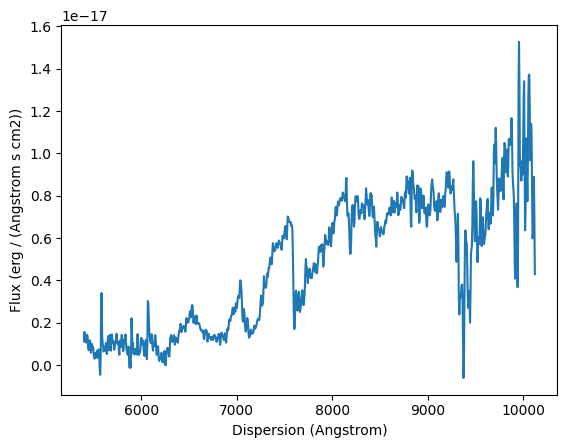

Plotable file name: ULAS_J233227.03+123452.0_M6_OSIRIS_GTC63-13A_Primeval-IV.fits
Reading OSIRIS FITS file: ULAS_J231924.35+052524.5_esdL1_OSIRIS_GTC46-14A_Primeval-IV.fits

REPLACING erg / (angstrom s cm2) with erg / (angstrom s cm2)


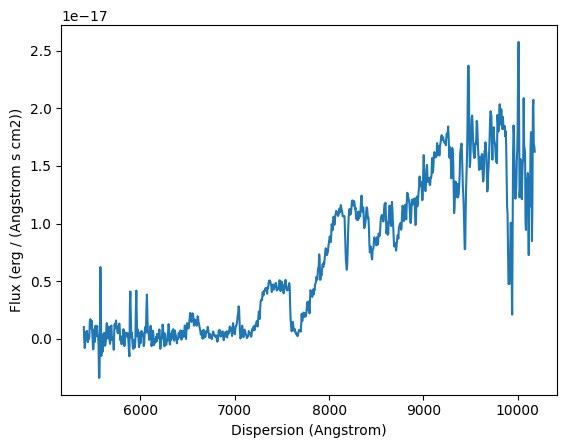

Plotable file name: ULAS_J231924.35+052524.5_esdL1_OSIRIS_GTC46-14A_Primeval-IV.fits
Reading OSIRIS FITS file: ULAS_J143517.18-014713.1_sdM9_OSIRIS_GTC63-13A_Primeval-IV.fits

REPLACING erg / (angstrom s cm2) with erg / (angstrom s cm2)


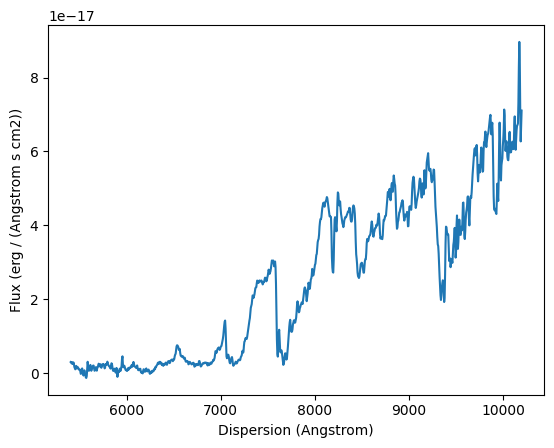

Plotable file name: ULAS_J143517.18-014713.1_sdM9_OSIRIS_GTC63-13A_Primeval-IV.fits
Reading OSIRIS FITS file: ULAS_J021258.08+064115.9_sdL1_OSIRIS_GTC39-12B_Primeval-IV.fits

REPLACING erg / (angstrom s cm2) with erg / (angstrom s cm2)


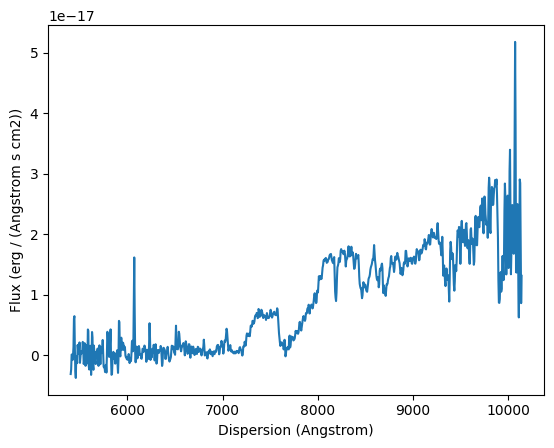

Plotable file name: ULAS_J021258.08+064115.9_sdL1_OSIRIS_GTC39-12B_Primeval-IV.fits
Reading OSIRIS FITS file: ULAS_J223123.44+010025.1_M6_OSIRIS_GTC63-13A_Primeval-IV.fits

REPLACING erg / (angstrom s cm2) with erg / (angstrom s cm2)


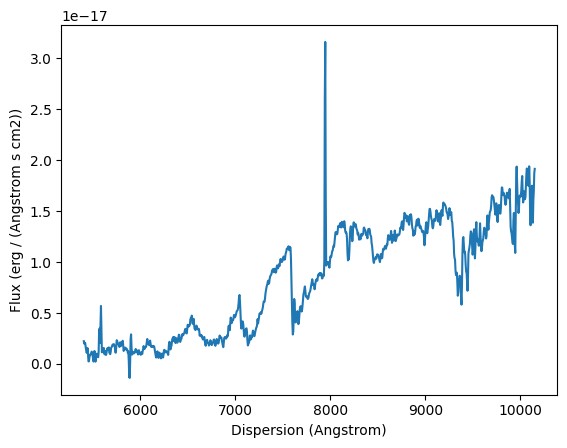

Plotable file name: ULAS_J223123.44+010025.1_M6_OSIRIS_GTC63-13A_Primeval-IV.fits
Reading OSIRIS FITS file: ULAS_J151649.84+083607.1_sdL5_OSIRIS_GTC46-14A_Primeval-IV.fits

REPLACING erg / (angstrom s cm2) with erg / (angstrom s cm2)


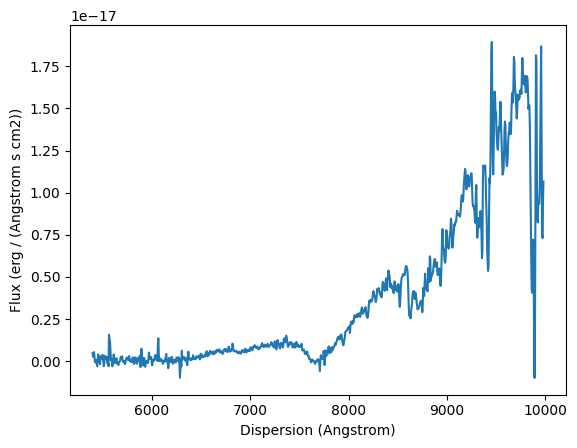

Plotable file name: ULAS_J151649.84+083607.1_sdL5_OSIRIS_GTC46-14A_Primeval-IV.fits
Reading OSIRIS FITS file: ULAS_J125938.50+301500.2_M9_OSIRIS_GTC63-13A_Primeval-IV.fits

REPLACING erg / (angstrom s cm2) with erg / (angstrom s cm2)


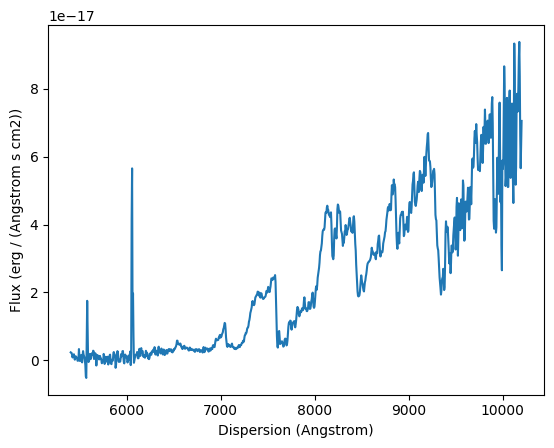

Plotable file name: ULAS_J125938.50+301500.2_M9_OSIRIS_GTC63-13A_Primeval-IV.fits
Reading OSIRIS FITS file: ULAS_J111429.54+072809.5_esdL0_OSIRIS_GTC39-12B_Primeval-IV.fits

REPLACING erg / (angstrom s cm2) with erg / (angstrom s cm2)


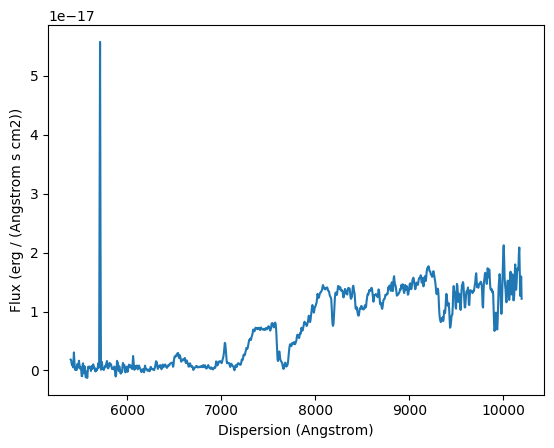

Plotable file name: ULAS_J111429.54+072809.5_esdL0_OSIRIS_GTC39-12B_Primeval-IV.fits
Reading OSIRIS FITS file: ULAS_J135359.58+011856.7_sdL0_OSIRIS_GTC46-14A_Primeval-IV.fits

REPLACING erg / (angstrom s cm2) with erg / (angstrom s cm2)


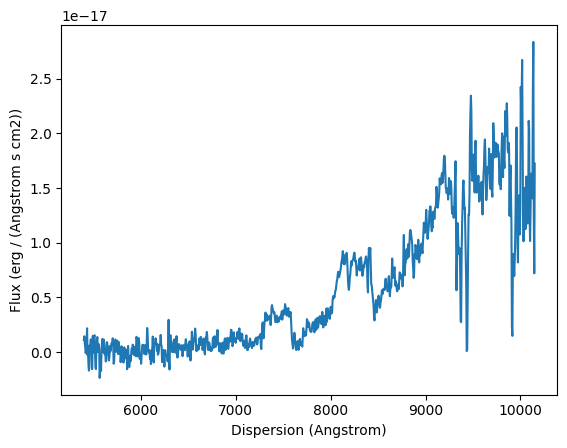

Plotable file name: ULAS_J135359.58+011856.7_sdL0_OSIRIS_GTC46-14A_Primeval-IV.fits
Reading OSIRIS FITS file: ULAS_J223302.03+062030.8_esdL0.5_OSIRIS_GTC39-12B_Primeval-IV.fits

REPLACING erg / (angstrom s cm2) with erg / (angstrom s cm2)


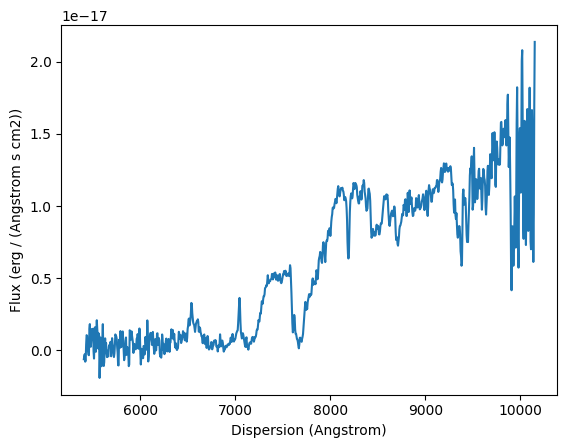

Plotable file name: ULAS_J223302.03+062030.8_esdL0.5_OSIRIS_GTC39-12B_Primeval-IV.fits
Reading OSIRIS FITS file: ULAS_J230256.53+121310.2_sdL0_OSIRIS_GTC63-13A_Primeval-IV.fits

REPLACING erg / (angstrom s cm2) with erg / (angstrom s cm2)


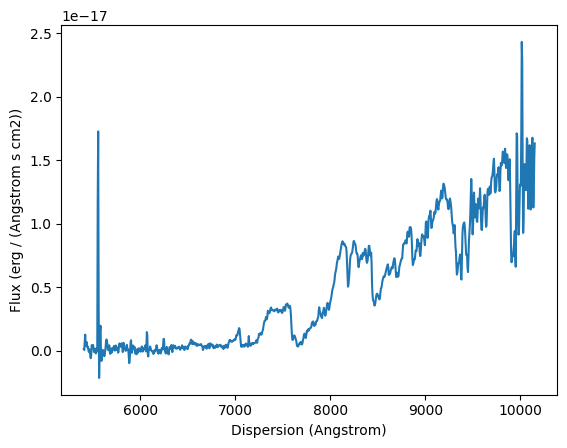

Plotable file name: ULAS_J230256.53+121310.2_sdL0_OSIRIS_GTC63-13A_Primeval-IV.fits
Reading OSIRIS FITS file: ULAS_J144151.55+043738.5_sdL4_OSIRIS_GTC46-14A_Primeval-IV.fits

REPLACING erg / (angstrom s cm2) with erg / (angstrom s cm2)


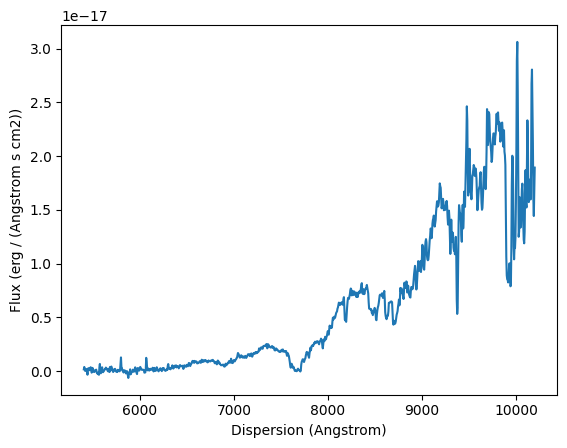

Plotable file name: ULAS_J144151.55+043738.5_sdL4_OSIRIS_GTC46-14A_Primeval-IV.fits
Reading OSIRIS FITS file: ULAS_J134852.93+101611.8_sdL0_OSIRIS_GTC63-13A_Primeval-IV.fits

REPLACING erg / (angstrom s cm2) with erg / (angstrom s cm2)


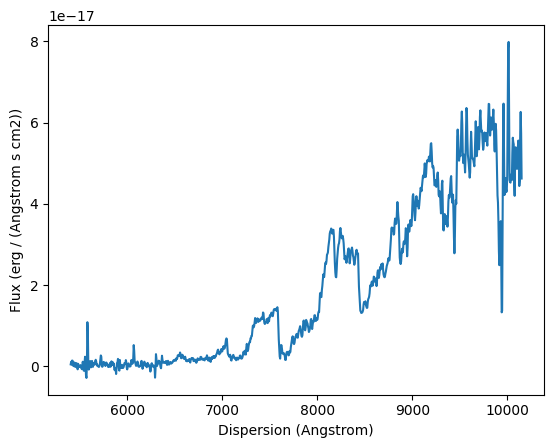

Plotable file name: ULAS_J134852.93+101611.8_sdL0_OSIRIS_GTC63-13A_Primeval-IV.fits
Reading OSIRIS FITS file: ULAS_J075335.23+200622.4_sdL0_OSIRIS_GTC39-12B_Primeval-IV.fits

REPLACING erg / (angstrom s cm2) with erg / (angstrom s cm2)


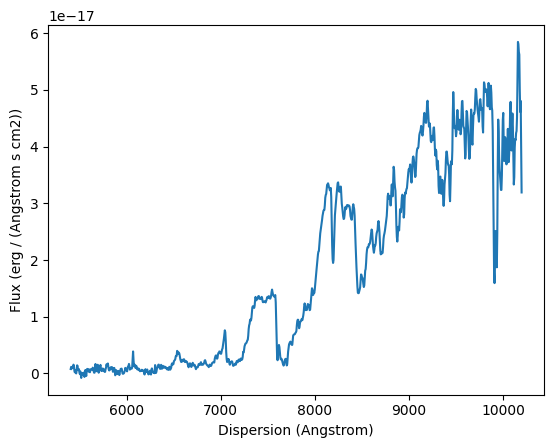

Plotable file name: ULAS_J075335.23+200622.4_sdL0_OSIRIS_GTC39-12B_Primeval-IV.fits
Reading OSIRIS FITS file: ULAS_J230443.30+093423.9_sdL0_OSIRIS_GTC63-13A_Primeval-IV.fits

REPLACING erg / (angstrom s cm2) with erg / (angstrom s cm2)


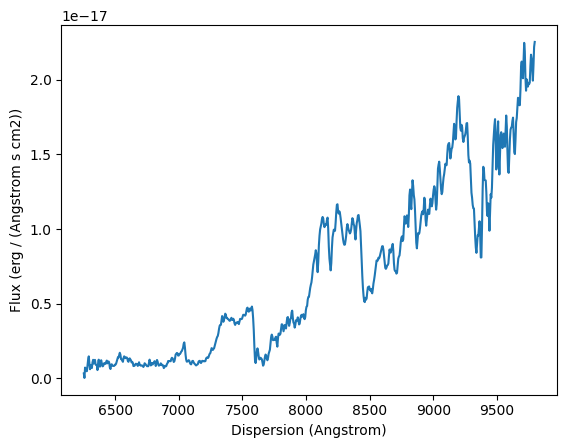

Plotable file name: ULAS_J230443.30+093423.9_sdL0_OSIRIS_GTC63-13A_Primeval-IV.fits
Reading OSIRIS FITS file: ULAS_J224054.61+030902.0_M7_OSIRIS_GTC63-13A_Primeval-IV.fits

REPLACING erg / (angstrom s cm2) with erg / (angstrom s cm2)


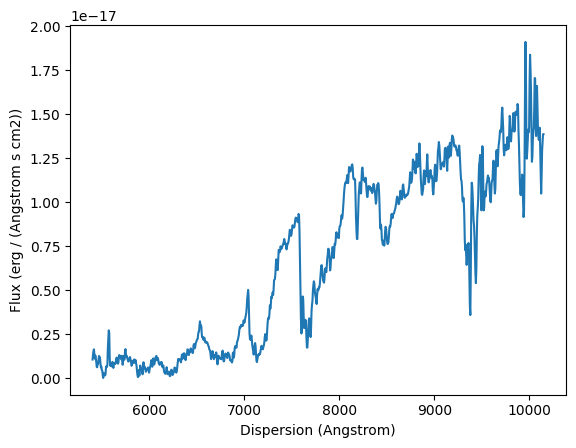

Plotable file name: ULAS_J224054.61+030902.0_M7_OSIRIS_GTC63-13A_Primeval-IV.fits
Reading OSIRIS FITS file: ULAS_J231924.35+052524.5_esdL1_comb_OSIRIS_scombine_Primeval-IV.fits

REPLACING erg / (angstrom s cm2) with erg / (angstrom s cm2)


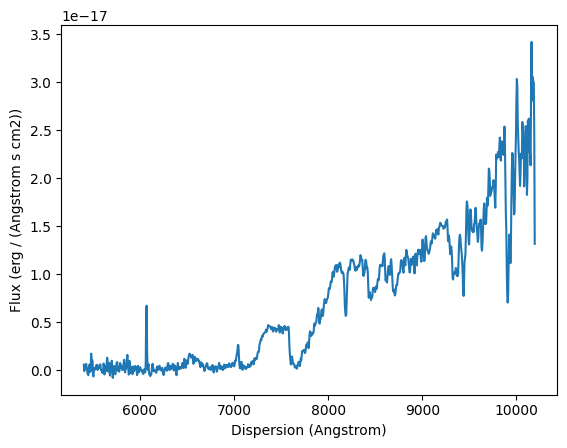

Plotable file name: ULAS_J231924.35+052524.5_esdL1_comb_OSIRIS_scombine_Primeval-IV.fits
Reading OSIRIS FITS file: SDSS_J133348.24+273508.8_sdL1_OSIRIS_GTC65-13B_Primeval-I.fits

REPLACING erg / (angstrom s cm2) with erg / (angstrom s cm2)


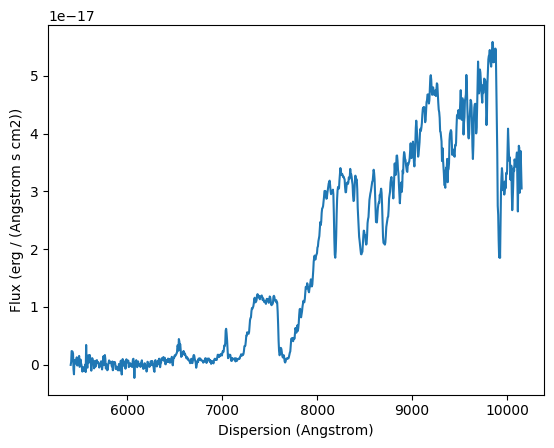

Plotable file name: SDSS_J133348.24+273508.8_sdL1_OSIRIS_GTC65-13B_Primeval-I.fits
Reading OSIRIS FITS file: ULAS_J001931.33+063111.0_M9_OSIRIS_GTC39-12B_Primeval-IV.fits

REPLACING erg / (angstrom s cm2) with erg / (angstrom s cm2)


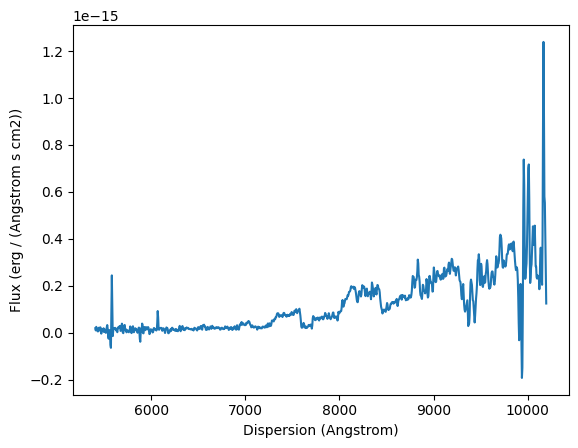

Plotable file name: ULAS_J001931.33+063111.0_M9_OSIRIS_GTC39-12B_Primeval-IV.fits
Reading OSIRIS FITS file: ULAS_J141832.35+025323.0_sdL0_OSIRIS_GTC39-12B_Primeval-IV.fits

REPLACING erg / (angstrom s cm2) with erg / (angstrom s cm2)


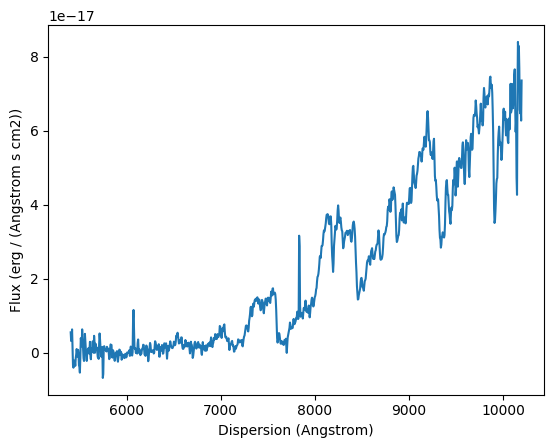

Plotable file name: ULAS_J141832.35+025323.0_sdL0_OSIRIS_GTC39-12B_Primeval-IV.fits
Reading OSIRIS FITS file: ULAS_J233227.03+123452.0_L6p+T4p_OSIRIS_GTC46-14A_Primeval-IV.fits

REPLACING erg / (angstrom s cm2) with erg / (angstrom s cm2)


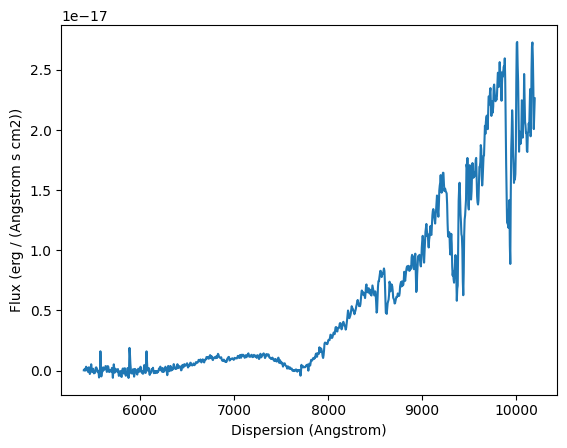

Plotable file name: ULAS_J233227.03+123452.0_L6p+T4p_OSIRIS_GTC46-14A_Primeval-IV.fits
Reading OSIRIS FITS file: ULAS_J141832.35+025323.0_sdL0_comb_OSIRIS_scombine_Primeval-IV.fits

REPLACING erg / (angstrom s cm2) with erg / (angstrom s cm2)


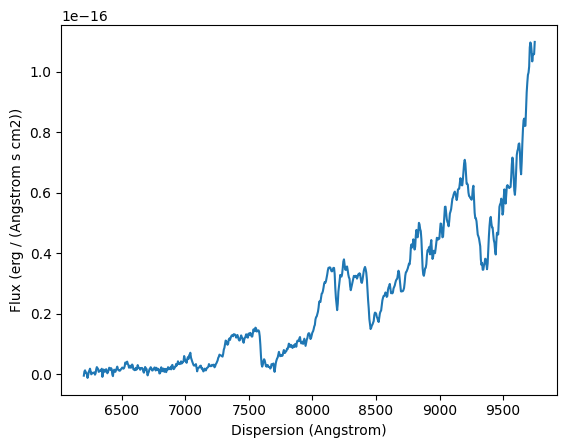

Plotable file name: ULAS_J141832.35+025323.0_sdL0_comb_OSIRIS_scombine_Primeval-IV.fits
Reading OSIRIS FITS file: ULAS_J134505.85+342441.8_M9_OSIRIS_GTC63-13A_Primeval-IV.fits

REPLACING erg / (angstrom s cm2) with erg / (angstrom s cm2)


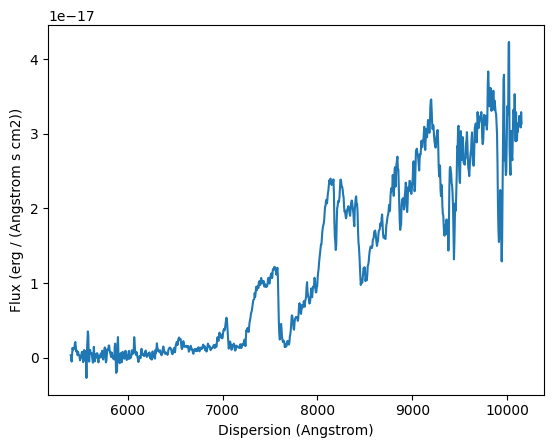

Plotable file name: ULAS_J134505.85+342441.8_M9_OSIRIS_GTC63-13A_Primeval-IV.fits
Reading OSIRIS FITS file: ULAS_J001837.37+020015.7_M9_OSIRIS_GTC63-13A_Primeval-IV.fits

REPLACING erg / (angstrom s cm2) with erg / (angstrom s cm2)


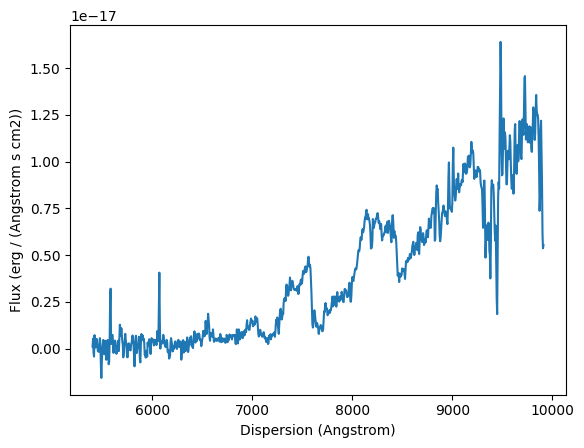

Plotable file name: ULAS_J001837.37+020015.7_M9_OSIRIS_GTC63-13A_Primeval-IV.fits
Reading OSIRIS FITS file: ULAS_J205721.89+005628.7_M7_OSIRIS_GTC63-13A_Primeval-IV.fits

REPLACING erg / (angstrom s cm2) with erg / (angstrom s cm2)


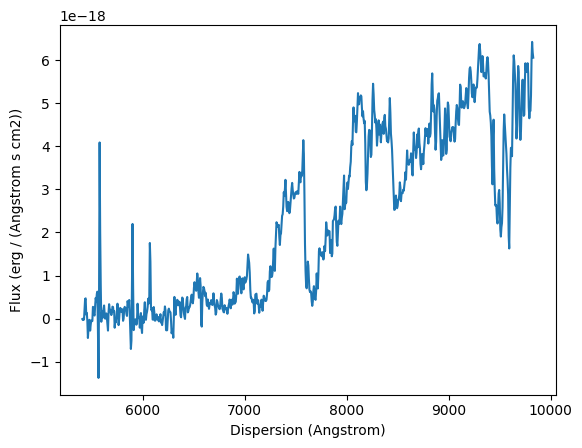

Plotable file name: ULAS_J205721.89+005628.7_M7_OSIRIS_GTC63-13A_Primeval-IV.fits
Reading OSIRIS FITS file: ULAS_J225902.14+115602.1_sdL0_OSIRIS_GTC46-14A_Primeval-IV.fits

REPLACING erg / (angstrom s cm2) with erg / (angstrom s cm2)


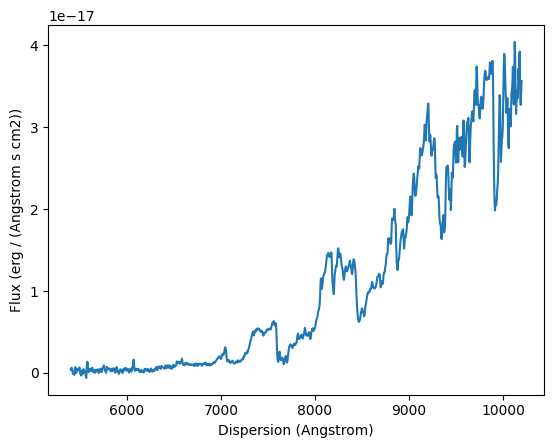

Plotable file name: ULAS_J225902.14+115602.1_sdL0_OSIRIS_GTC46-14A_Primeval-IV.fits
Reading OSIRIS FITS file: ULAS_J224749.77+053207.9_M7_OSIRIS_GTC46-14A_Primeval-IV.fits

REPLACING erg / (angstrom s cm2) with erg / (angstrom s cm2)


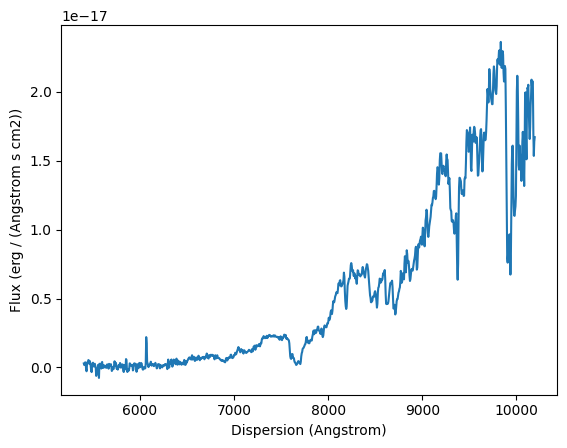

Plotable file name: ULAS_J224749.77+053207.9_M7_OSIRIS_GTC46-14A_Primeval-IV.fits
Reading OSIRIS FITS file: ULAS_J024035.36+060629.3_sdM7_OSIRIS_GTC39-12B_Primeval-IV.fits

REPLACING erg / (angstrom s cm2) with erg / (angstrom s cm2)


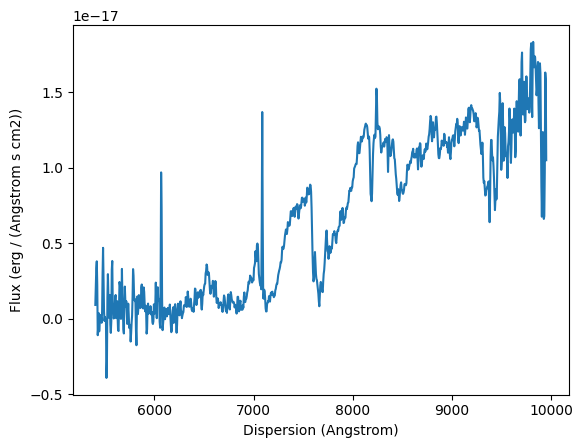

Plotable file name: ULAS_J024035.36+060629.3_sdM7_OSIRIS_GTC39-12B_Primeval-IV.fits
Reading OSIRIS FITS file: ULAS_J134423.98+280603.8_sdL4_OSIRIS_GTC63-13A_Primeval-IV.fits

REPLACING erg / (angstrom s cm2) with erg / (angstrom s cm2)


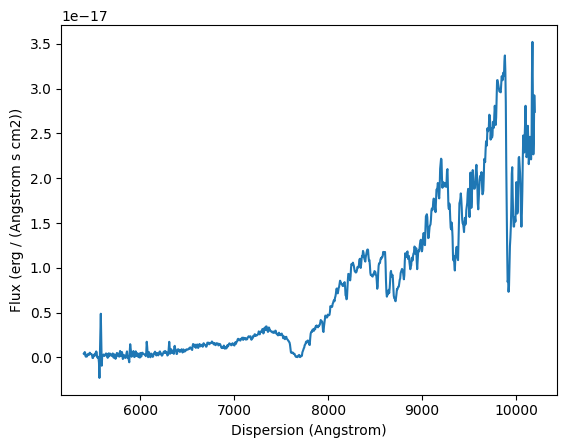

Plotable file name: ULAS_J134423.98+280603.8_sdL4_OSIRIS_GTC63-13A_Primeval-IV.fits
Reading OSIRIS FITS file: ULAS_J020858.62+020657.0_esdL3_OSIRIS_GTC63-13A_Primeval-III.fits

REPLACING erg / (angstrom s cm2) with erg / (angstrom s cm2)


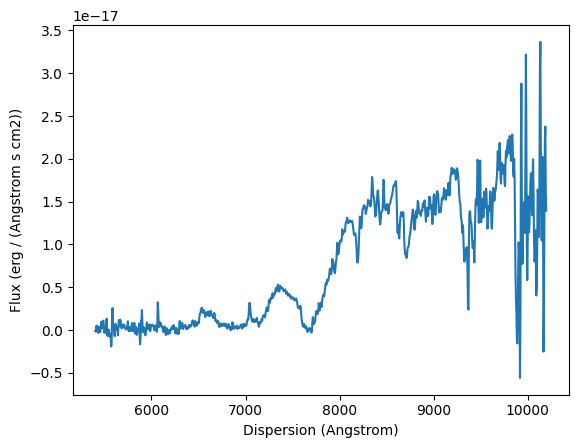

Plotable file name: ULAS_J020858.62+020657.0_esdL3_OSIRIS_GTC63-13A_Primeval-III.fits
Reading OSIRIS FITS file: WISEA_J001450.17-083823.4_esdL0_OSIRIS_GTC80-15A_Primeval-I.fits

REPLACING erg / (angstrom s cm2) with erg / (angstrom s cm2)


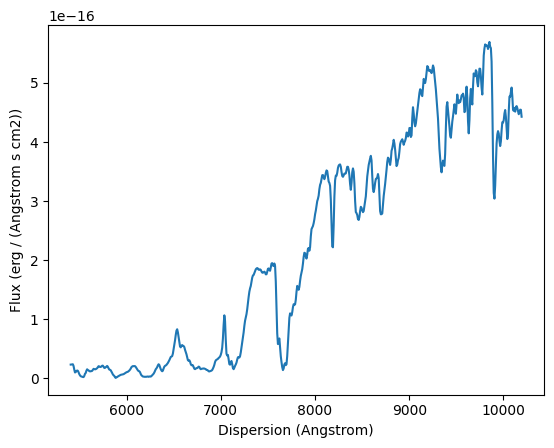

Plotable file name: WISEA_J001450.17-083823.4_esdL0_OSIRIS_GTC80-15A_Primeval-I.fits
Reading OSIRIS FITS file: ULAS_J004716.65+161242.4_M9_OSIRIS_GTC63-13A_Primeval-IV.fits

REPLACING erg / (angstrom s cm2) with erg / (angstrom s cm2)


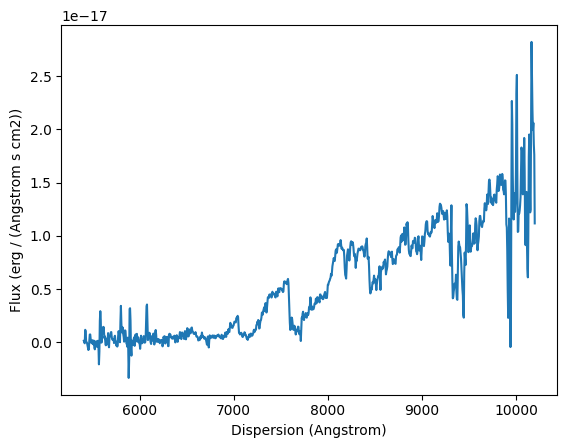

Plotable file name: ULAS_J004716.65+161242.4_M9_OSIRIS_GTC63-13A_Primeval-IV.fits
Reading OSIRIS FITS file: ULAS_J141832.35+025323.0_sdL0_OSIRIS_GTC46-14A_Primeval-IV.fits

REPLACING erg / (angstrom s cm2) with erg / (angstrom s cm2)


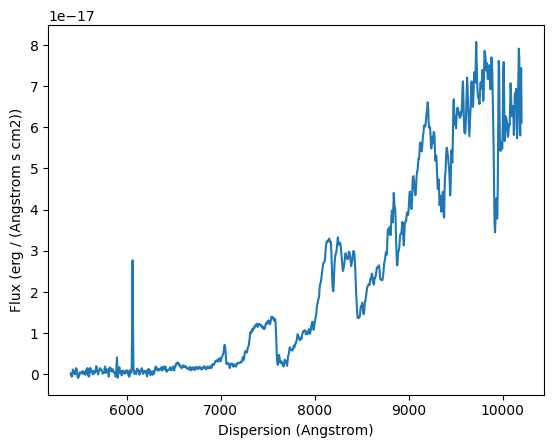

Plotable file name: ULAS_J141832.35+025323.0_sdL0_OSIRIS_GTC46-14A_Primeval-IV.fits
Reading OSIRIS FITS file: 2MASS_J00412179+3547133_sdL0.5_OSIRIS_GTC80-15A_Primeval-I.fits

REPLACING erg / (angstrom s cm2) with erg / (angstrom s cm2)


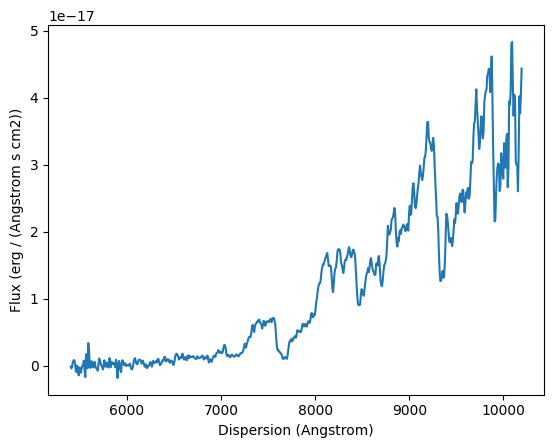

Plotable file name: 2MASS_J00412179+3547133_sdL0.5_OSIRIS_GTC80-15A_Primeval-I.fits
Reading OSIRIS FITS file: ULAS_J223623.17+034344.5_M9_OSIRIS_GTC63-13A_Primeval-IV.fits

REPLACING erg / (angstrom s cm2) with erg / (angstrom s cm2)


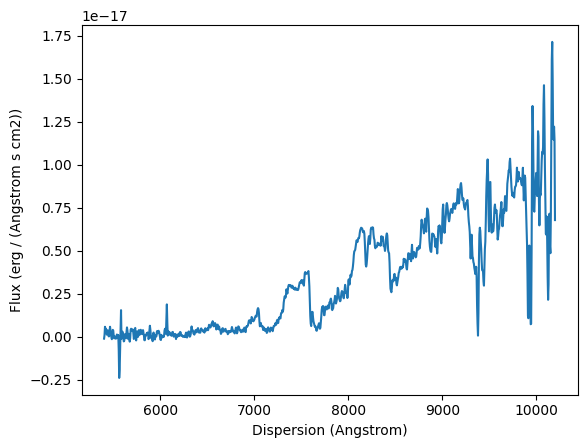

Plotable file name: ULAS_J223623.17+034344.5_M9_OSIRIS_GTC63-13A_Primeval-IV.fits
Reading OSIRIS FITS file: ULAS_J002009.35+160451.2_sdM9_OSIRIS_GTC63-13A_Primeval-IV.fits

REPLACING erg / (angstrom s cm2) with erg / (angstrom s cm2)


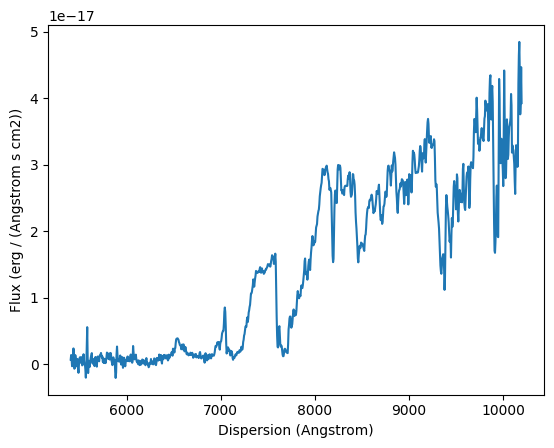

Plotable file name: ULAS_J002009.35+160451.2_sdM9_OSIRIS_GTC63-13A_Primeval-IV.fits
Reading OSIRIS FITS file: ULAS_J135122.15+141914.9_esdM7_OSIRIS_GTC63-13A_Primeval-IV.fits

REPLACING erg / (angstrom s cm2) with erg / (angstrom s cm2)


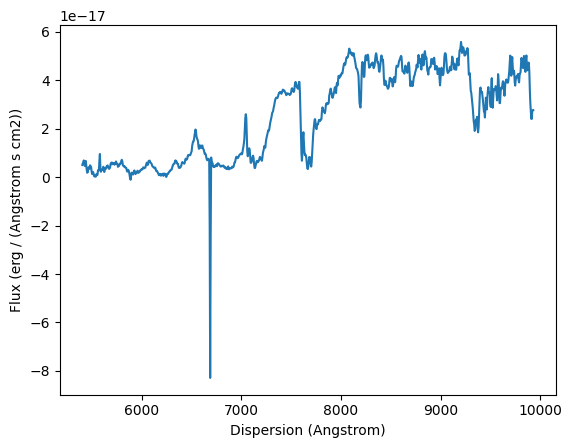

Plotable file name: ULAS_J135122.15+141914.9_esdM7_OSIRIS_GTC63-13A_Primeval-IV.fits
Reading OSIRIS FITS file: ULAS_J214816.13+012225.1_M7_OSIRIS_GTC63-13A_Primeval-IV.fits

REPLACING erg / (angstrom s cm2) with erg / (angstrom s cm2)


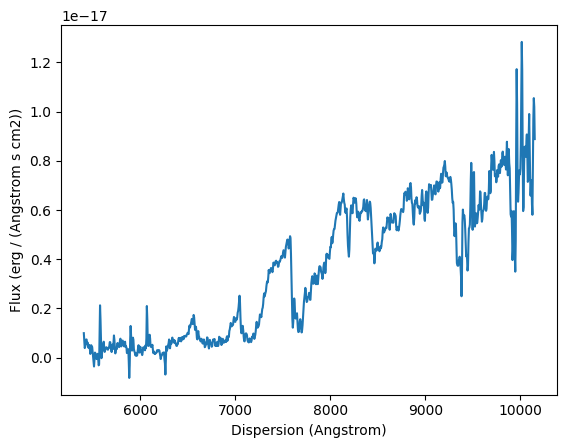

Plotable file name: ULAS_J214816.13+012225.1_M7_OSIRIS_GTC63-13A_Primeval-IV.fits
Reading OSIRIS FITS file: ULAS_J231949.36+044559.5_M7_OSIRIS_GTC46-14A_Primeval-IV.fits

REPLACING erg / (angstrom s cm2) with erg / (angstrom s cm2)


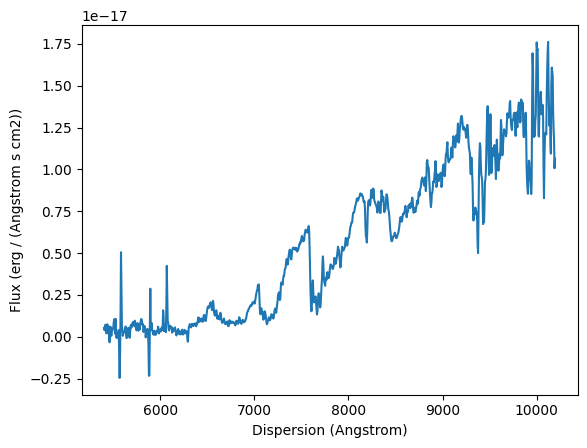

Plotable file name: ULAS_J231949.36+044559.5_M7_OSIRIS_GTC46-14A_Primeval-IV.fits
Reading OSIRIS FITS file: ULAS_J225902.14+115602.1_sdL0_OSIRIS_GTC63-13A_Primeval-IV.fits

REPLACING erg / (angstrom s cm2) with erg / (angstrom s cm2)


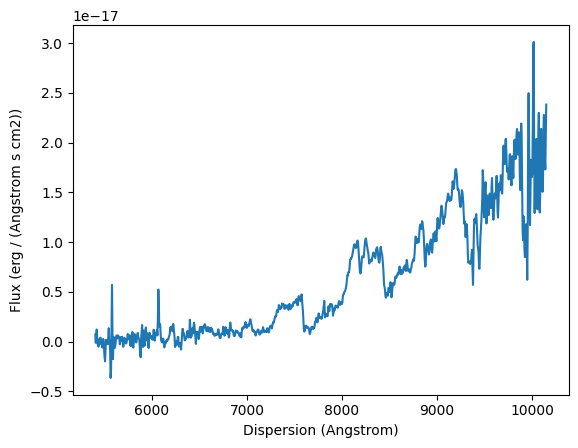

Plotable file name: ULAS_J225902.14+115602.1_sdL0_OSIRIS_GTC63-13A_Primeval-IV.fits
Reading OSIRIS FITS file: ULAS_J011711.98-005213.4_M7_OSIRIS_GTC63-13A_Primeval-IV.fits

REPLACING erg / (angstrom s cm2) with erg / (angstrom s cm2)


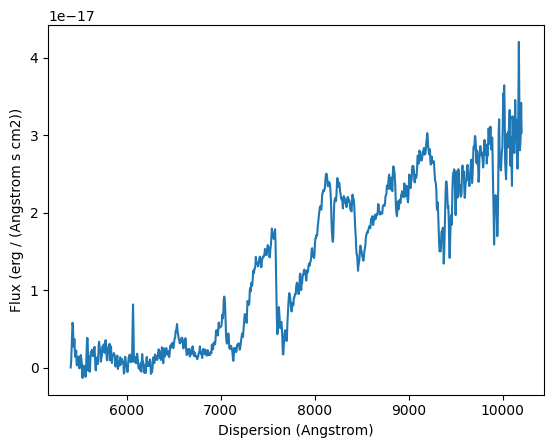

Plotable file name: ULAS_J011711.98-005213.4_M7_OSIRIS_GTC63-13A_Primeval-IV.fits
Reading OSIRIS FITS file: ULAS_J134505.85+342441.8_M9_OSIRIS_GTC46-14A_Primeval-IV.fits

REPLACING erg / (angstrom s cm2) with erg / (angstrom s cm2)


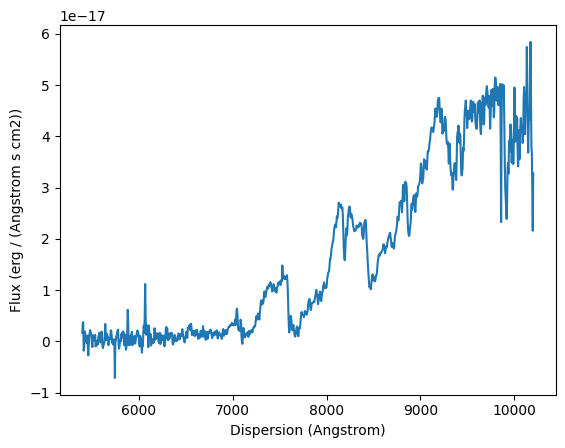

Plotable file name: ULAS_J134505.85+342441.8_M9_OSIRIS_GTC46-14A_Primeval-IV.fits
Reading OSIRIS FITS file: ULAS_J004602.85+091131.2_M9_OSIRIS_GTC63-13A_Primeval-IV.fits

REPLACING erg / (angstrom s cm2) with erg / (angstrom s cm2)


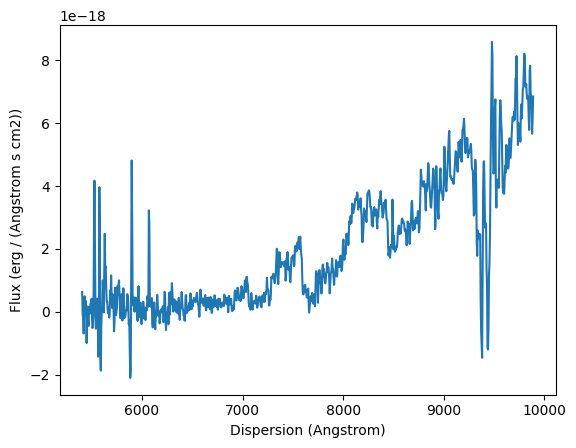

Plotable file name: ULAS_J004602.85+091131.2_M9_OSIRIS_GTC63-13A_Primeval-IV.fits
Reading OSIRIS FITS file: ULAS_J134505.85+342441.8_M9_comb_OSIRIS_scombine_Primeval-IV.fits

REPLACING erg / (angstrom s cm2) with erg / (angstrom s cm2)


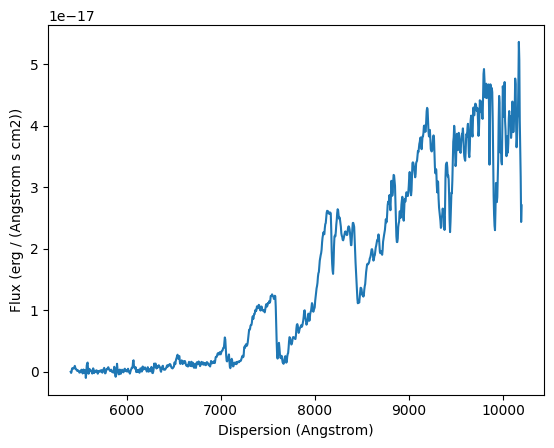

Plotable file name: ULAS_J134505.85+342441.8_M9_comb_OSIRIS_scombine_Primeval-IV.fits
Reading OSIRIS FITS file: ULAS_J023803.12+054526.1_sdL0_OSIRIS_GTC80-15A_Primeval-IV.fits

REPLACING erg / (angstrom s cm2) with erg / (angstrom s cm2)


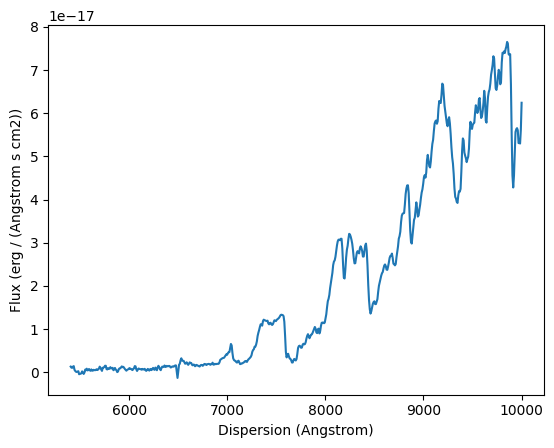

Plotable file name: ULAS_J023803.12+054526.1_sdL0_OSIRIS_GTC80-15A_Primeval-IV.fits
Reading OSIRIS FITS file: ULAS_J230711.01+014447.1_usdL4.5_OSIRIS_GTC63-13A_Primeval-III.fits

REPLACING erg / (angstrom s cm2) with erg / (angstrom s cm2)


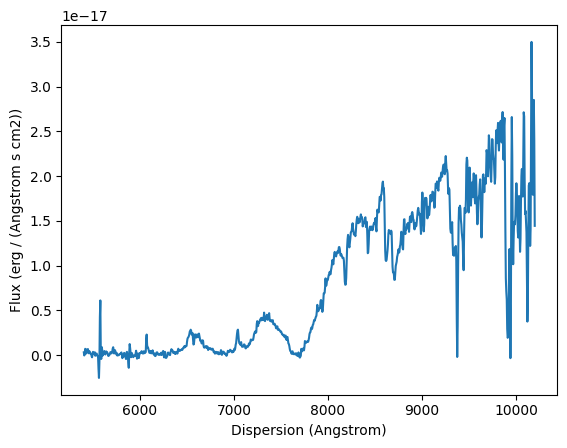

Plotable file name: ULAS_J230711.01+014447.1_usdL4.5_OSIRIS_GTC63-13A_Primeval-III.fits
Reading OSIRIS FITS file: ULAS_J125226.62+092920.1_sdL0.5_OSIRIS_GTC80-15A_Primeval-IV.fits

REPLACING erg / (angstrom s cm2) with erg / (angstrom s cm2)


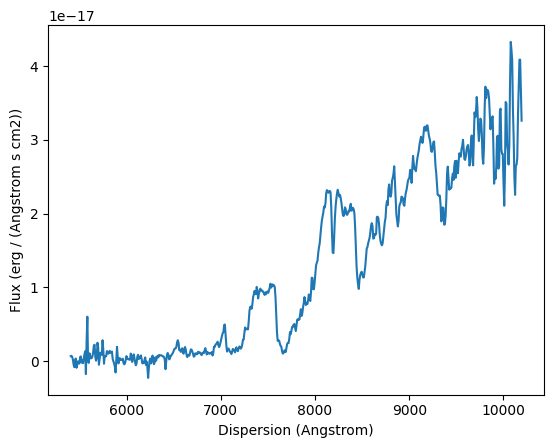

Plotable file name: ULAS_J125226.62+092920.1_sdL0.5_OSIRIS_GTC80-15A_Primeval-IV.fits
Reading OSIRIS FITS file: ULAS_J011840.73+084424.7_sdL0_OSIRIS_GTC63-13A_Primeval-IV.fits

REPLACING erg / (angstrom s cm2) with erg / (angstrom s cm2)


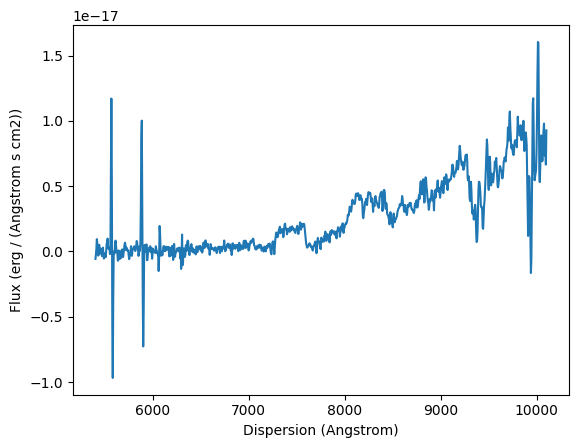

Plotable file name: ULAS_J011840.73+084424.7_sdL0_OSIRIS_GTC63-13A_Primeval-IV.fits
Reading OSIRIS FITS file: ULAS_J124104.75-000531.4_sdL0_OSIRIS_GTC63-13A_Primeval-IV.fits

REPLACING erg / (angstrom s cm2) with erg / (angstrom s cm2)


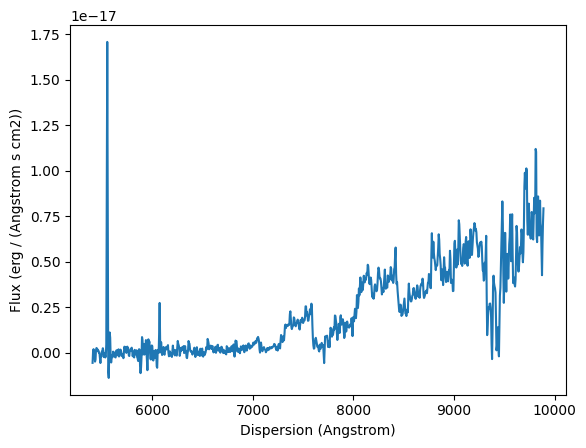

Plotable file name: ULAS_J124104.75-000531.4_sdL0_OSIRIS_GTC63-13A_Primeval-IV.fits

Total files plotted: 75
Total files failed: 6


In [211]:
# Test for OSIRIS instrument
for filename in os.listdir(path):
    if filename.endswith(".fits") and "osiris" in filename.lower():

        # Get fits files from sty2054 directory
        file_path = os.path.join(path, filename)

        # file info
        # fits.info(file_path)
        # print(fits.getheader(file_path))
        
        try:
            print(f"Reading OSIRIS FITS file: {filename}\n")

            with fits.open(file_path, mode="update") as filehandle:
                unit_string =  "erg / (angstrom s cm2)"
                print(f"REPLACING {filehandle[0].header['BUNIT']} with {unit_string}")
                filehandle[0].header["BUNIT"] = unit_string

            with fits.open(file_path) as hdul:
                header = hdul[0].header

                # Helper funct to calculate wavelength
                spectrum = spectrum.read(file_path, format="wcs1d-fits")
                if filename == "ULAS_J230443.30+093423.9_sdL0_OSIRIS_GTC63-13A_Primeval-IV.fits":
                        spectrum = extract_region(spectrum, SpectralRegion(0.625*u.um, 0.98*u.um))
                if filename == "ULAS_J141832.35+025323.0_sdL0_comb_OSIRIS_scombine_Primeval-IV.fits":
                        spectrum = extract_region(spectrum, SpectralRegion(0.62*u.um, 0.975*u.um))
                else:
                        spectrum = extract_region(spectrum, SpectralRegion(0.54*u.um, 1.02*u.um))
                
                # Check and plot if the new file can be read in SIMPLE
                if check_spectrum_plottable(spectrum,raise_error=True, show_plot=True):
                    print(f"Plotable file name: {filename}")
                    file_plotted += 1

        except Exception as e:
            print(f"Error reading {filename}: {e}")
            print(f"Header info: {header}")
            file_failed += 1
            continue
        
print(f"\nTotal files plotted: {file_plotted}")
print(f"Total files failed: {file_failed}")